# Kenyan Livestock Data Analysis

This notebook provides a comprehensive analysis of livestock data across Kenyan counties from 2021-2023, focusing on population trends, production values, and economic impact. We'll explore patterns in livestock distribution, analyze production efficiency, and identify economic opportunities across different regions.

## 1. Load and Explore the Data

First, we'll import necessary libraries and load the comprehensive livestock dataset. We'll then examine the data structure, types, and basic statistics to understand the scope of our analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
file_path = 'comprehensive_livestock_data.csv'
livestock_data = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {livestock_data.shape}")
print(f"\nFirst few rows of the dataset:")
livestock_data.head()

Dataset shape: (141, 68)

First few rows of the dataset:


,County,YEAR,Milk_Unit_price_Kshs,Pork_Unit_price_Kshs,Wool_Unit_price_Kshs,Dairy_Cattle,Beef_Cattle,Wool_sheep,Hair_sheep,Dairy_Goats,Meat_Goats,Donkeys,Camels,Log_Hives,Langstroth_Hives,Box_hives,Cab_hives,Turkeys,Ducks,Geese,Guinea_fowl,Pigeons,Doves,Quails,Ostrich,pigs,Rabbits,Chicken_Broilers,Chicken_layers,Chicken_Indigenous,Honey_kg,Wax_kg,Eggs_Trays,Hides_No,Skins_No,Camel_meat_kg,Camel_meat_Unit_price_Kshs,Camel_meat_Total_value_Kshs,Honey_Kgs,Honey_Kgs_Unit_price_Kshs,Honey_Kgs_Total_value_Kshs,Hides,Hides_Unit_price_Kshs,Hides_Total_value_Kshs,Skins,Skins_Unit_price_Kshs,Skins_Total_value_Kshs,Milk_kg,Milk_Total_value_Kshs,Beef_kg,Beef_Unit_price_Kshs,Beef_Total_value_Kshs,Mutton_kg,Mutton_Unit_price_Kshs,Mutton_Total_value_Kshs,Pork_kg,Pork_Total_value_Kshs,Rabbit_meat_kg,Rabbit_Unit_price_Kshs,Rabbit_Total_value_Kshs,Poultry_meat_kg,Poultry_Unit_price_Kshs,Poultry_Total_value_Kshs,Wool_kg,Wool_Total_value_Kshs,chevon_kg,chevon_Unit_price_Kshs,chevon_Total_value_Kshs
0,Baringo,2021,40,400,40,"148,211","373,807","15,509","527,622","6,360","953,741","9,062","13,464","152,518","3,202",NaN,NaN,"1,250","2,373",NaN,104,NaN,"1,709",NaN,NaN,253,"3,772","42,714","46,806","1,043,032","773,394","138,648","21,427,197","14,279","64,027","116,985",400,"46,794,000","882,385",600,"529,431,000","116,985",400,"46,794,000","882,385",600,"529,431,000","34,218,882","1,368,755,280","2,228,672",400,"891,468,688","323,633",500,"161,816,500","4,182","1,672,800","1,933",350,"676,550","411,167",500,"205,583,500","34,218,882","1,368,755,280","2,228,672",400,"891,468,688"
1,Baringo,2022,51,400,20,"145,919","361,753","16,052","361,179","6,526","937,081","5,002","13,249","152,607","3,454",NaN,NaN,446,"1,955",152,NaN,NaN,"1,426",0,22,329,"5,155","21,392","37,163","1,012,570",NaN,NaN,NaN,NaN,NaN,"127,037",500,"63,518,500","970,623",600,"582,373,800","11,618",200,"2,323,600","107,111",50,"5,355,550","37,640,770","1,913,405,808","2,562,973",600,"1,537,783,800","388,359",700,"271,851,300","1,680","672,000","1,546",330,"510,312","414,281",207,"85,618,073","1,236","24,720","1,762,579",700,"1,233,805,300"
2,Baringo,2023,0,0,0,"147,496","383,626","18,439","380,921","7,743","1,046,051","4,443","19,263","165,939","3,819",5,NaN,270,"1,303",227,568,165,NaN,15,NaN,350,"6,503","15,906","31,173","1,251,753",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bomet,2021,40,550,40,"320,264","7,639","84,567","81,305","79,548","71,436","10,227",NaN,NaN,"4,594",NaN,NaN,"1,929","2,007",331,NaN,NaN,NaN,NaN,NaN,309,"6,302","13,439","91,701","883,494","342,208","85,552","39,839,808","16,920","20,400",NaN,NaN,NaN,"347,342","1,000","347,342,000",NaN,NaN,NaN,"347,342","1,000","347,342,000","128,963,790","5,158,551,600","117,088",450,"52,689,600","307,532",500,"153,766,000","13,550","7,452,500","7,136",350,"2,497,600","1,280,374",650,"832,243,100","128,963,790","5,158,551,600","117,088",450,"52,689,600"
4,Bomet,2022,42,600,30,"325,070","7,791","86,682","75,365","81,138","72,507","10,415",NaN,NaN,"4,869",NaN,NaN,"2,036","2,129","2,210",NaN,NaN,NaN,0,0,358,"6,491","13,581","93,993","924,125",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"650,698","1,000","650,698,000",NaN,200,NaN,NaN,20,NaN,"130,899,083","5,497,761,486","198,671",500,"99,335,250","4,584,309",700,"3,209,016,300","30,461","18,276,600","7,020",350,"2,457,000","1,574,412",433,"682,245,200","3,250","97,500","4,315,409",700,"3,020,786,300"


In [3]:
# Check for missing values
missing_values = livestock_data.isnull().sum()
print(f"Columns with missing values:\n{missing_values[missing_values > 0]}")

# Get basic information about the dataset
livestock_data.info()

Columns with missing values:
Dairy_Cattle                 7
Beef_Cattle                  7
Wool_sheep                  89
Hair_sheep                   6
Dairy_Goats                  7
                          ... 
Wool_kg                    112
Wool_Total_value_Kshs      112
chevon_kg                   60
chevon_Unit_price_Kshs      60
chevon_Total_value_Kshs     60
Length: 63, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   County                       141 non-null    object
 1   YEAR                         141 non-null    int64 
 2   Milk_Unit_price_Kshs         141 non-null    int64 
 3   Pork_Unit_price_Kshs         141 non-null    int64 
 4   Wool_Unit_price_Kshs         141 non-null    int64 
 5   Dairy_Cattle                 134 non-null    object
 6   Beef_Cattle                  134 non-nu

In [4]:
# Examine the range of years and counties in the dataset
years = livestock_data['YEAR'].unique()
counties = livestock_data['County'].unique()

print(f"Years covered: {sorted(years)}")
print(f"Number of counties: {len(counties)}")
print(f"Counties covered: {sorted(counties)}")

Years covered: [2021, 2022, 2023]
Number of counties: 47
Counties covered: ['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo_Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita_Taveta', 'Tana_River', 'Tharaka_Nithi', 'Trans-Nzoia', 'Turkana', 'Uasin_Gishu', 'Vihiga', 'Wajir', 'West Pokot']


In [5]:
# Identify the types of livestock and products in the dataset
livestock_columns = [col for col in livestock_data.columns if any(animal in col for animal in ['Cattle', 'Goats', 'sheep', 'pigs', 'Chicken', 'Donkeys', 'Camels', 'Hives', 'Turkeys', 'Ducks', 'Geese', 'Guinea', 'Pigeons', 'Doves', 'Quails', 'Ostrich', 'Rabbits'])]

product_columns = [col for col in livestock_data.columns if any(product in col for product in ['milk', 'meat', 'Eggs', 'Honey', 'Wax', 'Hides', 'Skins', 'Wool'])]

print(f"Number of livestock type columns: {len(livestock_columns)}")
print(f"Number of product columns: {len(product_columns)}")

print("\nLivestock types tracked:")
for col in sorted(livestock_columns)[:20]:  # Show first 20 for brevity
    print(f"- {col}")

print("\nLivestock products tracked (first 20):")
for col in sorted(product_columns)[:20]:
    print(f"- {col}")

Number of livestock type columns: 23
Number of product columns: 23

Livestock types tracked:
- Beef_Cattle
- Camels
- Chicken_Broilers
- Chicken_Indigenous
- Chicken_layers
- Dairy_Cattle
- Dairy_Goats
- Donkeys
- Doves
- Ducks
- Geese
- Guinea_fowl
- Hair_sheep
- Langstroth_Hives
- Log_Hives
- Meat_Goats
- Ostrich
- Pigeons
- Quails
- Rabbits

Livestock products tracked (first 20):
- Camel_meat_Total_value_Kshs
- Camel_meat_Unit_price_Kshs
- Camel_meat_kg
- Eggs_Trays
- Hides
- Hides_No
- Hides_Total_value_Kshs
- Hides_Unit_price_Kshs
- Honey_Kgs
- Honey_Kgs_Total_value_Kshs
- Honey_Kgs_Unit_price_Kshs
- Honey_kg
- Poultry_meat_kg
- Rabbit_meat_kg
- Skins
- Skins_No
- Skins_Total_value_Kshs
- Skins_Unit_price_Kshs
- Wax_kg
- Wool_Total_value_Kshs


## 2. Data Cleaning and Preprocessing

The dataset requires cleaning to prepare it for analysis. We'll handle missing values, convert string numbers with commas to numeric values, standardize column names, and create derived features.

In [6]:
# Function to convert string numbers with commas to numeric values
def clean_numeric(df, exclude_cols=None):
    """
    Convert string columns with commas to numeric values
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame to clean
    exclude_cols : list
        List of columns to exclude from cleaning
        
    Returns:
    --------
    pandas DataFrame
        Cleaned DataFrame
    """
    if exclude_cols is None:
        exclude_cols = []
    
    df_clean = df.copy()
    
    for col in df_clean.columns:
        if col in exclude_cols:
            continue
            
        # Check if column contains string values with commas
        if df_clean[col].dtype == 'object':
            try:
                # Remove commas and convert to numeric
                df_clean[col] = df_clean[col].astype(str).str.replace(',', '').replace('NA', np.nan).astype(float)
            except:
                # If conversion fails, keep column as is
                pass
    
    return df_clean

# Clean the dataset
exclude_cols = ['County']  # Columns to exclude from cleaning
livestock_data_clean = clean_numeric(livestock_data, exclude_cols)

# Check the results of cleaning
print("Data types after cleaning:")
livestock_data_clean.dtypes.value_counts()

Data types after cleaning:



float64    63
int64       4
object      1
Name: count, dtype: int64

In [7]:
# Check for missing values
missing_values = livestock_data_clean.isnull().sum()
print(f"Columns with missing values:\n{missing_values[missing_values > 0]}")

# Get basic information about the dataset
livestock_data_clean.info()

Columns with missing values:
Dairy_Cattle                 7
Beef_Cattle                  7
Wool_sheep                  89
Hair_sheep                   6
Dairy_Goats                  7
                          ... 
Wool_kg                    112
Wool_Total_value_Kshs      112
chevon_kg                   60
chevon_Unit_price_Kshs      60
chevon_Total_value_Kshs     60
Length: 63, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   County                       141 non-null    object 
 1   YEAR                         141 non-null    int64  
 2   Milk_Unit_price_Kshs         141 non-null    int64  
 3   Pork_Unit_price_Kshs         141 non-null    int64  
 4   Wool_Unit_price_Kshs         141 non-null    int64  
 5   Dairy_Cattle                 134 non-null    float64
 6   Beef_Cattle                  13

In [8]:
# Create derived features

# Total livestock count per county-year
livestock_animal_cols = [col for col in livestock_columns if livestock_data_clean[col].mean() > 0]
livestock_data_clean['Total_Livestock'] = livestock_data_clean[livestock_animal_cols].sum(axis=1)

# Livestock diversity (number of different livestock types with non-zero population)
livestock_data_clean['Livestock_Diversity'] = (livestock_data_clean[livestock_animal_cols] > 0).sum(axis=1)

# Ratio of dairy to beef cattle
livestock_data_clean['Dairy_to_Beef_Ratio'] = livestock_data_clean['Dairy_Cattle'] / livestock_data_clean['Beef_Cattle']
livestock_data_clean['Dairy_to_Beef_Ratio'] = livestock_data_clean['Dairy_to_Beef_Ratio'].replace([np.inf, -np.inf], np.nan)

# Calculate production efficiency metrics where data is available
if 'Milk_kg' in livestock_data_clean.columns and 'Dairy_Cattle' in livestock_data_clean.columns:
    livestock_data_clean['Milk_per_Dairy_Cow'] = livestock_data_clean['Milk_kg'] / livestock_data_clean['Dairy_Cattle']
    livestock_data_clean['Milk_per_Dairy_Cow'] = livestock_data_clean['Milk_per_Dairy_Cow'].replace([np.inf, -np.inf], np.nan)

# Calculate total economic value of production
value_cols = [col for col in livestock_data_clean.columns if 'Total_value' in col]
livestock_data_clean['Total_Economic_Value'] = livestock_data_clean[value_cols].sum(axis=1)

# Display derived features
print("Derived features:")
derived_cols = ['Total_Livestock', 'Livestock_Diversity', 'Dairy_to_Beef_Ratio', 'Total_Economic_Value']
if 'Milk_per_Dairy_Cow' in livestock_data_clean.columns:
    derived_cols.append('Milk_per_Dairy_Cow')
    
livestock_data_clean[derived_cols].describe()

Derived features:


,Total_Livestock,Livestock_Diversity,Dairy_to_Beef_Ratio,Total_Economic_Value,Milk_per_Dairy_Cow
count,1.410000e+02,141.000000,133.000000,1.410000e+02,7.900000e+01
mean,3.070456e+06,17.851064,3.653837,8.114286e+09,8.783489e+05
std,2.966561e+06,4.264364,11.071061,1.134874e+10,5.390297e+06
min,0.000000e+00,0.000000,0.000002,0.000000e+00,2.189987e+02
25%,1.470403e+06,17.000000,0.037561,0.000000e+00,6.592290e+02
50%,2.198170e+06,19.000000,0.333244,4.715496e+09,9.432218e+02
75%,4.086059e+06,20.000000,1.444000,1.171185e+10,2.144296e+03
max,2.111380e+07,23.000000,85.681818,6.712605e+10,4.572520e+07


## 3. Exploratory Data Analysis

Let's analyze the distribution of different livestock types across counties and years, calculate summary statistics, and identify patterns in the data.

In [9]:
# Calculate summary statistics by county
county_summary = livestock_data_clean.groupby('County').agg({
    'Total_Livestock': 'mean',
    'Livestock_Diversity': 'mean',
    'Dairy_Cattle': 'mean',
    'Beef_Cattle': 'mean',
    'Wool_sheep': 'mean',
    'Hair_sheep': 'mean',
    'Dairy_Goats': 'mean',
    'Meat_Goats': 'mean',
    'pigs': 'mean',
    'Chicken_Indigenous': 'mean',
    'Chicken_layers': 'mean',
    'Chicken_Broilers': 'mean',
    'Total_Economic_Value': 'mean'
}).reset_index()

# Sort by total livestock population
county_summary = county_summary.sort_values('Total_Livestock', ascending=False)

# Display the top 10 counties by total livestock population
print("Top 10 counties by average livestock population:")
county_summary.head(10)

Top 10 counties by average livestock population:


,County,Total_Livestock,Livestock_Diversity,Dairy_Cattle,Beef_Cattle,Wool_sheep,Hair_sheep,Dairy_Goats,Meat_Goats,pigs,Chicken_Indigenous,Chicken_layers,Chicken_Broilers,Total_Economic_Value
42,Turkana,1.839747e+07,17.333333,9.000000,3.071351e+06,NaN,6.221289e+06,383.500000,7.077451e+06,289.666667,6.009620e+05,297704.666667,600.000000,3.819639e+10
45,Wajir,7.764080e+06,14.000000,24.333333,8.244683e+05,NaN,2.120949e+06,29.333333,3.017998e+06,NaN,4.854497e+05,13363.333333,8541.333333,2.862886e+10
23,Mandera,6.213716e+06,13.333333,645.000000,8.146467e+05,NaN,1.134895e+06,2456.333333,3.071867e+06,NaN,4.680467e+04,5668.333333,6589.666667,5.875362e+09
32,Narok,6.105096e+06,19.666667,99073.000000,1.406608e+06,72675.0,2.622879e+06,4894.333333,9.825223e+05,2362.000000,7.314770e+05,55975.333333,4726.000000,9.273965e+09
6,Garissa,5.972492e+06,16.333333,133169.666667,1.368417e+06,NaN,1.075509e+06,176.333333,2.074623e+06,NaN,3.621613e+05,92230.666667,135952.000000,6.401053e+09
26,Migori,5.677611e+06,20.000000,12597.000000,4.265073e+05,NaN,2.921980e+05,3529.333333,5.488927e+05,6844.666667,4.335383e+06,17754.666667,2790.000000,4.952427e+09
17,Kitui,5.674963e+06,18.000000,10290.000000,5.574457e+05,NaN,1.184013e+05,5715.333333,1.625185e+06,3330.333333,2.705086e+06,170830.333333,9650.000000,1.185441e+10
7,Homa Bay,5.495193e+06,18.666667,12115.666667,3.685863e+05,NaN,2.804783e+05,4852.666667,5.268593e+05,14605.333333,4.224664e+06,17329.333333,4752.000000,4.396119e+09
16,Kisumu,4.830111e+06,18.000000,24413.666667,2.258690e+05,NaN,2.481410e+05,3915.000000,1.942870e+05,106365.000000,3.293184e+06,67842.333333,635408.666667,8.129712e+09
21,Machakos,4.472753e+06,19.000000,63922.666667,3.061023e+05,NaN,2.013807e+05,7834.666667,5.867007e+05,9481.666667,2.291273e+06,470157.666667,427015.000000,5.949989e+09


In [10]:
# Calculate total livestock by type across all counties
livestock_totals = livestock_data_clean[livestock_animal_cols].sum().sort_values(ascending=False)

# Display top 15 livestock types
print("Top 15 livestock types by total population across all counties:")
livestock_totals.head(15)

# Calculate percentage of total for each livestock type
livestock_percentages = (livestock_totals / livestock_totals.sum() * 100).round(2)

# Create a table showing percentage distribution
livestock_distribution = pd.DataFrame({
    'Total_Population': livestock_totals.head(15),
    'Percentage': livestock_percentages.head(15)
})

livestock_distribution

Top 15 livestock types by total population across all counties:


,Total_Population,Percentage
Chicken_Indigenous,145162072.0,33.53
Meat_Goats,95341052.0,22.02
Hair_sheep,64816286.0,14.97
Beef_Cattle,46852103.0,10.82
Chicken_layers,17992530.0,4.16
Chicken_Broilers,15043042.0,3.47
Dairy_Cattle,14754021.0,3.41
Camels,12097536.0,2.79
Donkeys,4788128.0,1.11
Wool_sheep,3524930.0,0.81


In [11]:
# Analyze livestock distribution by year
yearly_totals = livestock_data_clean.groupby('YEAR')[livestock_animal_cols].sum()

# Calculate year-over-year changes
if len(yearly_totals) > 1:
    yearly_changes = yearly_totals.pct_change() * 100
    
    print("Percentage change in livestock populations from previous year:")
    yearly_changes.iloc[1:].T.sort_values(by=yearly_changes.index[1], ascending=False).head(10)
else:
    print("Not enough years to calculate changes")

Percentage change in livestock populations from previous year:


## 4. Statistical Analysis

Now we'll conduct statistical tests to identify significant differences between counties and years. We'll also calculate correlations between variables and identify factors that influence livestock productivity and economic value.

In [12]:
# Calculate correlation between livestock types and economic value
correlation_cols = ['Dairy_Cattle', 'Beef_Cattle', 'Wool_sheep', 'Hair_sheep', 
                    'Dairy_Goats', 'Meat_Goats', 'pigs', 'Chicken_Indigenous', 
                    'Chicken_layers', 'Chicken_Broilers', 'Total_Economic_Value']

correlation_matrix = livestock_data_clean[correlation_cols].corr()

# Display correlation with economic value
print("Correlation with Total Economic Value:")
correlation_with_value = correlation_matrix['Total_Economic_Value'].sort_values(ascending=False)
correlation_with_value

Correlation with Total Economic Value:


Total_Economic_Value    1.000000
Hair_sheep              0.397862
Meat_Goats              0.344036
Beef_Cattle             0.337933
Dairy_Cattle            0.202751
Wool_sheep              0.198766
Chicken_layers          0.162919
pigs                    0.059032
Dairy_Goats             0.056910
Chicken_Broilers       -0.044503
Chicken_Indigenous     -0.045974
Name: Total_Economic_Value, dtype: float64

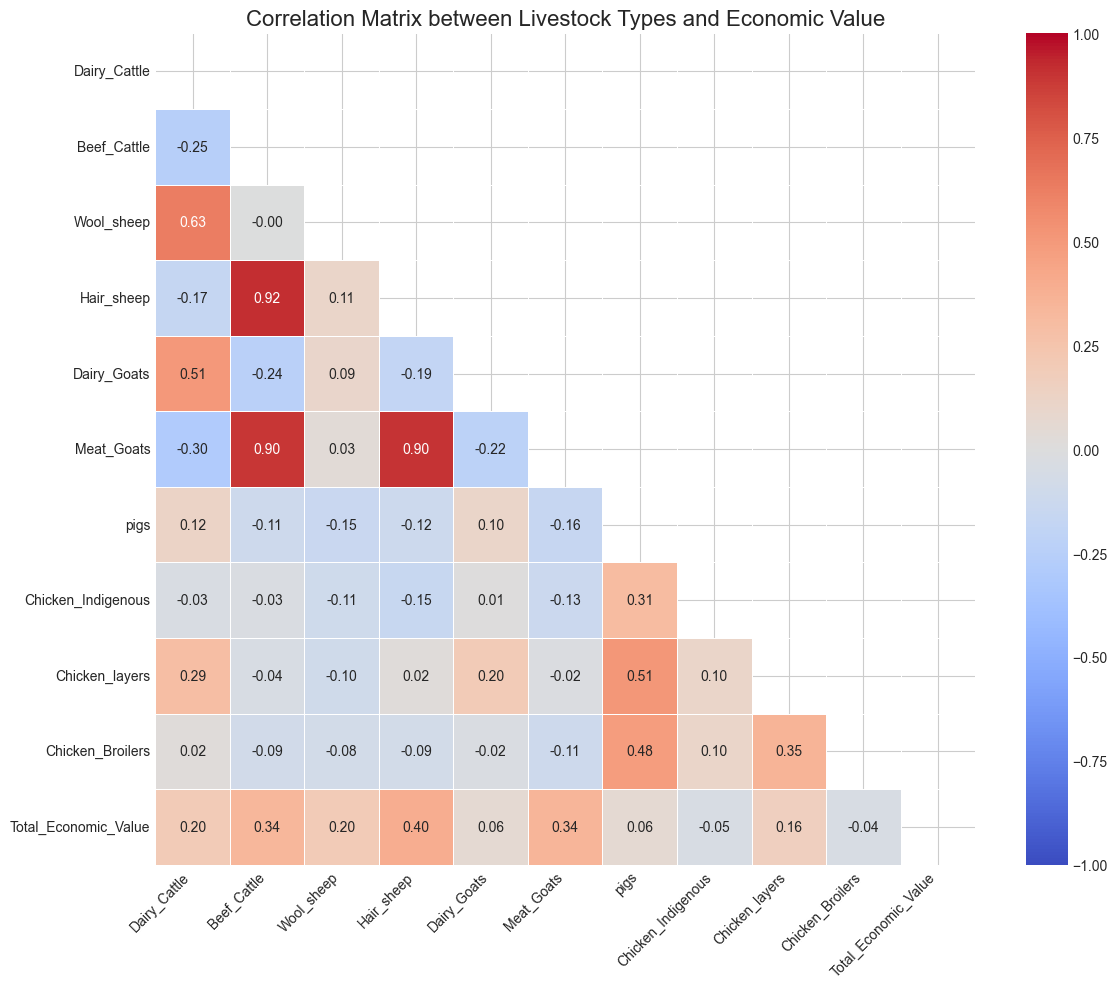

In [13]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix between Livestock Types and Economic Value', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Compare means of key metrics across years using ANOVA
if len(livestock_data_clean['YEAR'].unique()) > 1:
    from scipy import stats
    
    metrics_to_test = ['Dairy_Cattle', 'Beef_Cattle', 'Total_Livestock', 'Total_Economic_Value']
    
    for metric in metrics_to_test:
        groups = [livestock_data_clean[livestock_data_clean['YEAR'] == year][metric].dropna() 
                  for year in livestock_data_clean['YEAR'].unique()]
        
        # Perform ANOVA test
        f_stat, p_value = stats.f_oneway(*groups)
        
        print(f"ANOVA test for {metric} across years:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significant difference: {p_value < 0.05}\n")
else:
    print("Not enough years to perform statistical comparison")

ANOVA test for Dairy_Cattle across years:
F-statistic: 0.2235
p-value: 0.8000
Significant difference: False

ANOVA test for Beef_Cattle across years:
F-statistic: 0.0101
p-value: 0.9899
Significant difference: False

ANOVA test for Total_Livestock across years:
F-statistic: 0.3228
p-value: 0.7247
Significant difference: False

ANOVA test for Total_Economic_Value across years:
F-statistic: 24.8591
p-value: 0.0000
Significant difference: True



In [15]:
# Regression analysis to identify factors influencing economic value
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare features and target
X_cols = ['Dairy_Cattle', 'Beef_Cattle', 'Wool_sheep', 'Hair_sheep', 
          'Dairy_Goats', 'Meat_Goats', 'pigs', 'Chicken_Indigenous', 
          'Chicken_layers', 'Chicken_Broilers']

X = livestock_data_clean[X_cols].fillna(0)
y = livestock_data_clean['Total_Economic_Value'].fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X_cols,
    'Importance': model.coef_
})

feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature importance for predicting economic value:")
feature_importance

R-squared: 0.0422
RMSE: 10474688312.82

Feature importance for predicting economic value:


,Feature,Importance
6,pigs,36238.868889
2,Wool_sheep,19058.588315
0,Dairy_Cattle,13939.143851
3,Hair_sheep,6988.588913
8,Chicken_layers,2464.072884
5,Meat_Goats,1552.612315
7,Chicken_Indigenous,573.219026
9,Chicken_Broilers,-6628.261927
1,Beef_Cattle,-8807.571186
4,Dairy_Goats,-29398.851919


## 5. Visualization of Livestock Distribution

Let's create visualizations to show the distribution of different livestock types across counties using bar charts, heatmaps, and treemaps.

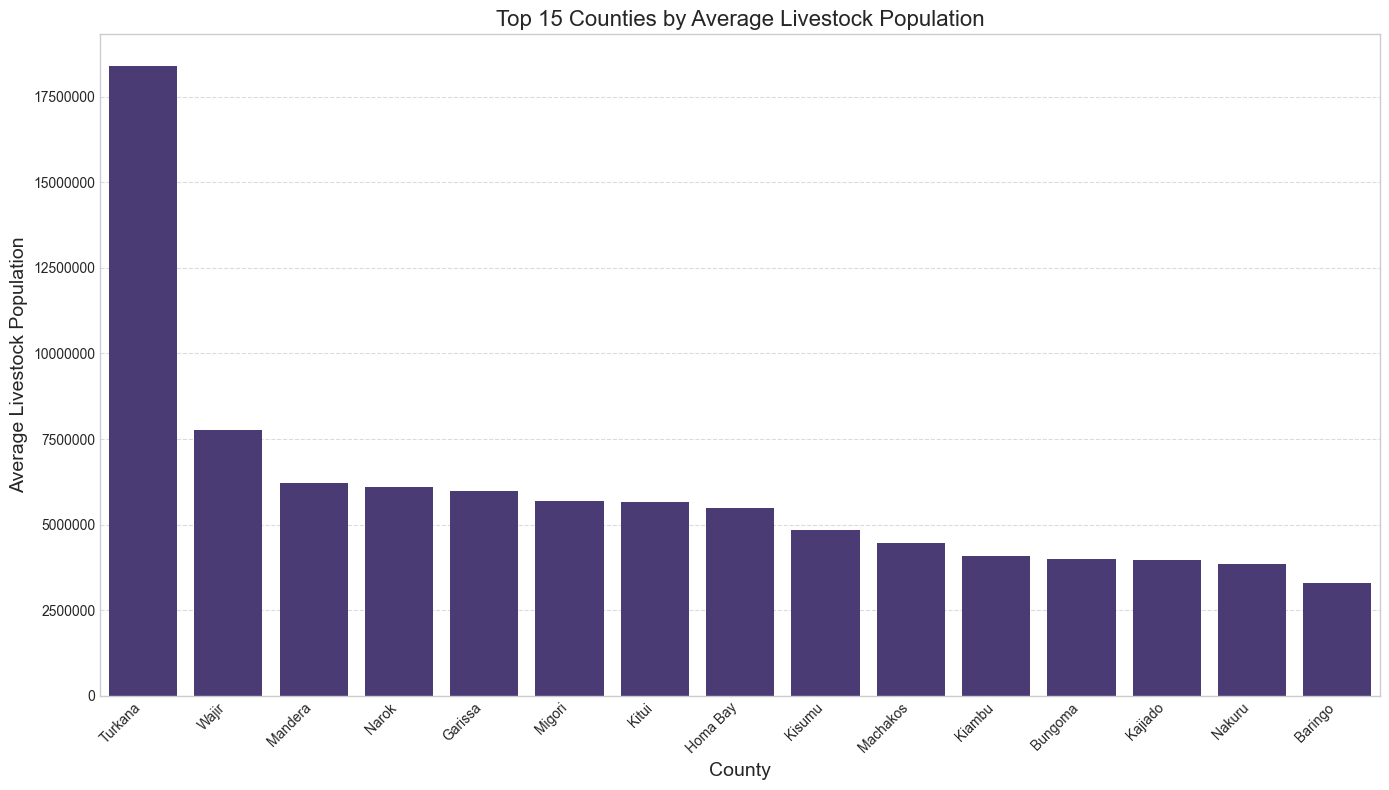

In [16]:
# Create bar chart of top 15 counties by total livestock population
plt.figure(figsize=(14, 8))
sns.barplot(data=county_summary.head(15), x='County', y='Total_Livestock')
plt.title('Top 15 Counties by Average Livestock Population', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Average Livestock Population', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Create interactive treemap of livestock distribution using Plotly
# Prepare data for treemap
livestock_types = ['Dairy_Cattle', 'Beef_Cattle', 'Wool_sheep', 'Hair_sheep', 
                  'Dairy_Goats', 'Meat_Goats', 'pigs', 'Chicken_Indigenous', 
                  'Chicken_layers', 'Chicken_Broilers']

counties_to_show = county_summary.head(10)['County'].tolist()

treemap_data = livestock_data_clean[livestock_data_clean['County'].isin(counties_to_show)]
treemap_data = treemap_data.groupby('County')[livestock_types].mean().reset_index()

# Melt the DataFrame for treemap preparation
treemap_melted = pd.melt(treemap_data, 
                        id_vars=['County'],
                        value_vars=livestock_types,
                        var_name='Livestock_Type', 
                        value_name='Population')

# Create treemap
fig = px.treemap(treemap_melted, 
                path=[px.Constant("All Counties"), 'County', 'Livestock_Type'], 
                values='Population',
                color='Population',
                color_continuous_scale='Viridis',
                title='Distribution of Livestock Types Across Top 10 Counties')

fig.update_layout(height=700, width=1000)
fig.show()

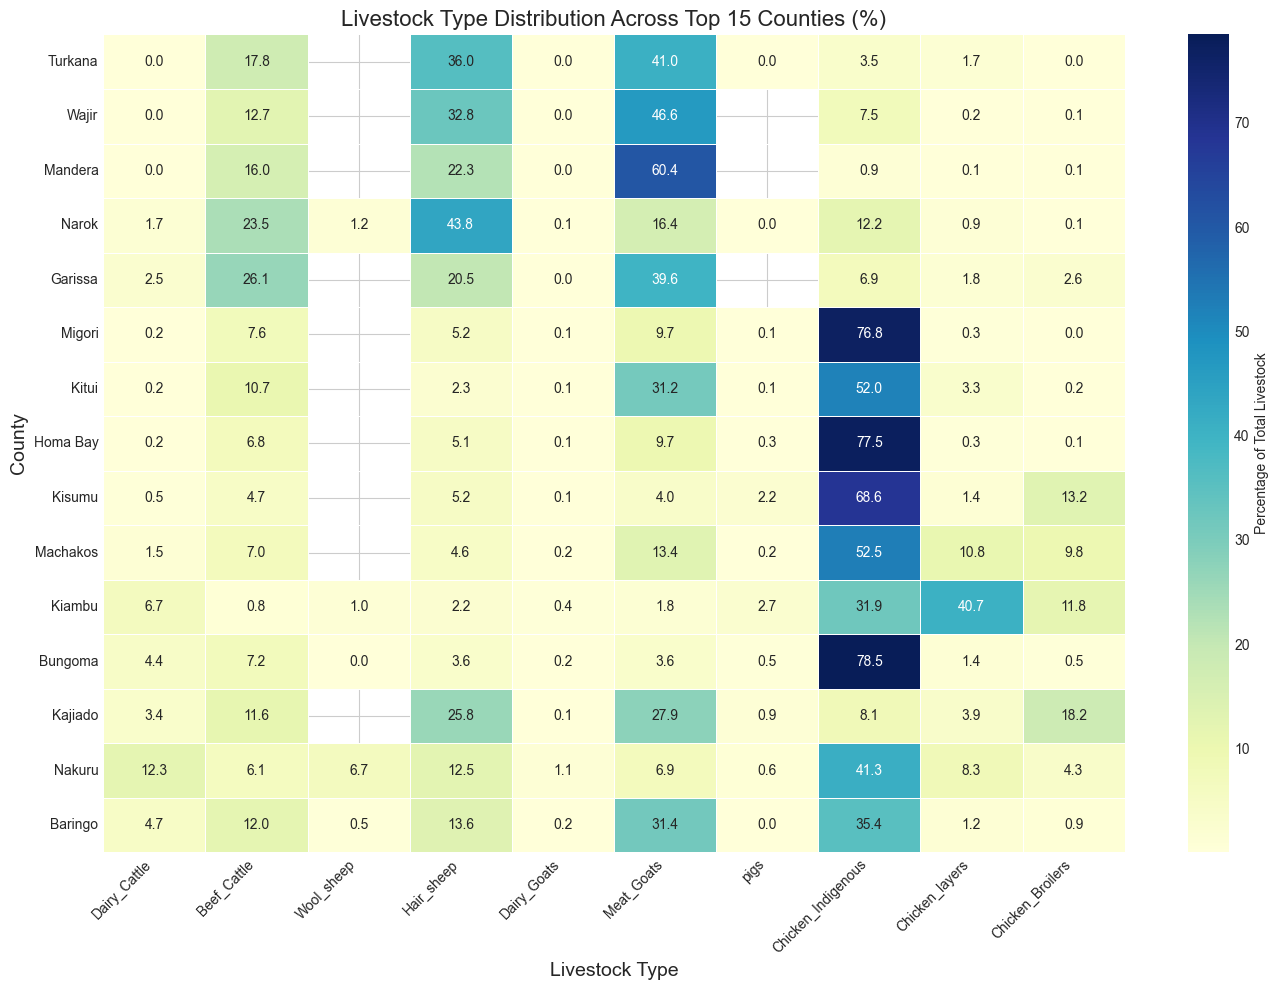

In [18]:
# Create a heatmap showing livestock diversity across counties
# Calculate the percentage of each livestock type in each county
county_livestock_matrix = livestock_data_clean.groupby('County')[livestock_types].mean()

# Normalize by row (county) to get percentage distribution
county_livestock_percent = county_livestock_matrix.div(county_livestock_matrix.sum(axis=1), axis=0) * 100

# Select top 15 counties by total livestock
top_counties = county_summary.head(15)['County'].tolist()
county_livestock_percent = county_livestock_percent.loc[top_counties]

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(county_livestock_percent, cmap='YlGnBu', annot=True, fmt='.1f', 
            linewidths=0.5, cbar_kws={'label': 'Percentage of Total Livestock'})
plt.title('Livestock Type Distribution Across Top 15 Counties (%)', fontsize=16)
plt.xlabel('Livestock Type', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Time Series Analysis

Now we'll analyze how livestock populations and production values have changed over the years, creating line plots showing trends for key metrics.

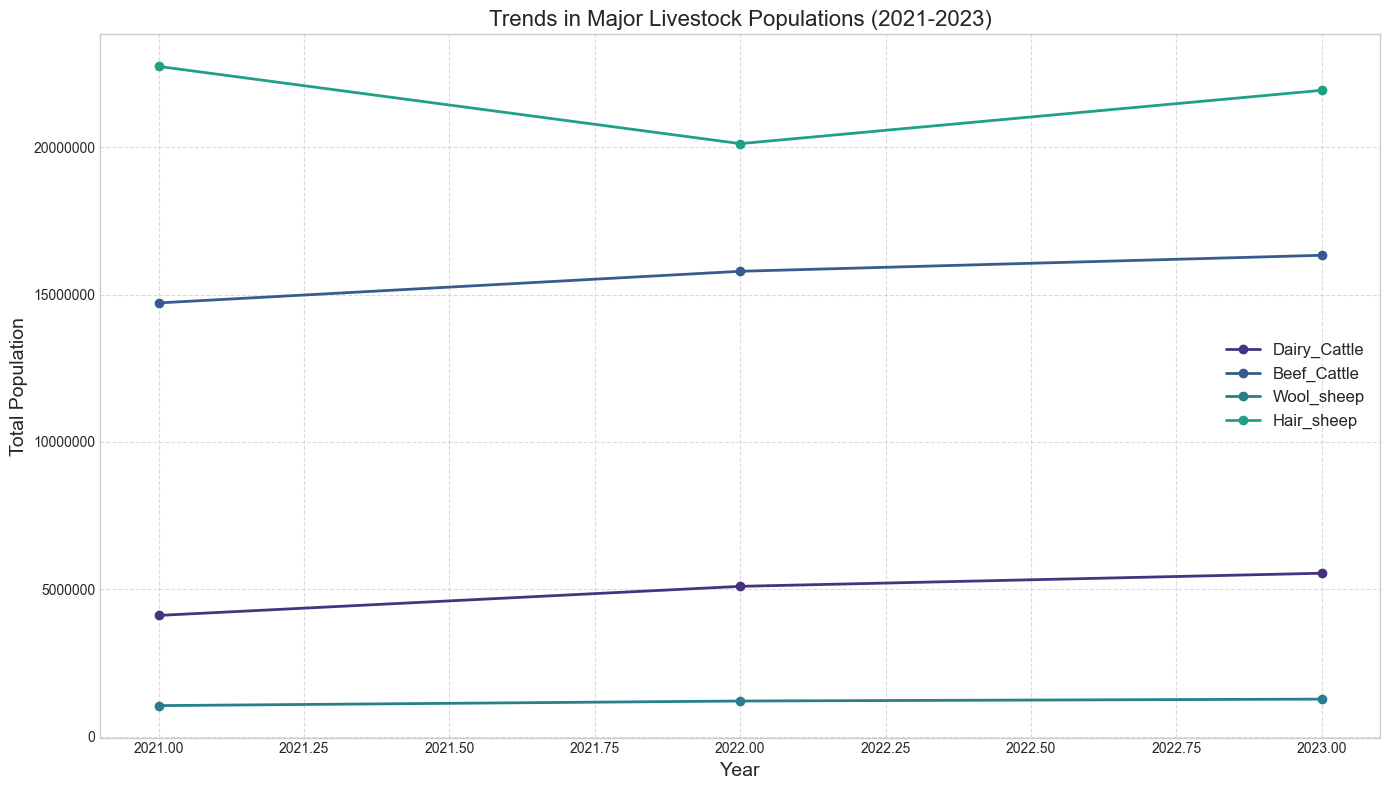

In [19]:
# Create time series plots for key livestock populations
# Prepare data by aggregating by year
yearly_data = livestock_data_clean.groupby('YEAR').agg({
    'Dairy_Cattle': 'sum',
    'Beef_Cattle': 'sum',
    'Wool_sheep': 'sum',
    'Hair_sheep': 'sum',
    'Dairy_Goats': 'sum',
    'Meat_Goats': 'sum',
    'pigs': 'sum',
    'Chicken_Indigenous': 'sum',
    'Total_Economic_Value': 'sum'
}).reset_index()

# Create line plots
plt.figure(figsize=(14, 8))
for column in yearly_data.columns[1:5]:  # Plot first 4 livestock types
    plt.plot(yearly_data['YEAR'], yearly_data[column], marker='o', linewidth=2, label=column)

plt.title('Trends in Major Livestock Populations (2021-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Population', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [20]:
# Create interactive time series plot with Plotly
# Focus on economic value trends
fig = px.line(yearly_data, x='YEAR', y='Total_Economic_Value', 
             title='Trend in Total Economic Value of Livestock Production (2021-2023)',
             markers=True, line_shape='linear')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Economic Value (KShs)',
    yaxis=dict(tickformat=','),
    height=500, width=900,
    template='plotly_white'
)

fig.show()

In [21]:
# Compare yearly trends for top 5 counties by economic value
# Get top 5 counties by average economic value
top_econ_counties = county_summary.sort_values('Total_Economic_Value', ascending=False).head(5)['County'].tolist()

# Filter data for these counties
top_counties_data = livestock_data_clean[livestock_data_clean['County'].isin(top_econ_counties)]

# Create time series for each county
county_yearly_data = top_counties_data.groupby(['County', 'YEAR']).agg({
    'Total_Economic_Value': 'sum',
    'Dairy_Cattle': 'sum',
    'Beef_Cattle': 'sum'
}).reset_index()

# Create interactive plot
fig = px.line(county_yearly_data, x='YEAR', y='Total_Economic_Value', color='County',
             title='Economic Value Trends for Top 5 Counties (2021-2023)',
             markers=True, line_shape='linear')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Economic Value (KShs)',
    yaxis=dict(tickformat=','),
    height=600, width=900,
    template='plotly_white',
    legend_title='County'
)

fig.show()

## 7. Geographic Analysis

Let's perform a geographic analysis to visualize the distribution of livestock across Kenya. We'll use geopandas to create maps showing livestock density and production values at the county level.

In [22]:
# For proper geographic analysis, we would need Kenya county shapefile
# Here we'll simulate the process by creating a choropleth map using Plotly
try:
    import geopandas as gpd
    
    # Load Kenya county shapefile (you would need to have this file)
    # kenya_counties = gpd.read_file('path_to_kenya_counties_shapefile.shp')
    
    print("To perform geographic analysis, you need to:")
    print("1. Download Kenya county shapefile")
    print("2. Install geopandas package")
    print("3. Uncomment and modify the code in this cell")
    
except ImportError:
    print("To perform geographic analysis with geopandas, install it using:")
    print("pip install geopandas")
    print("\nAlternatively, we can create a simplified choropleth visualization using Plotly.")

To perform geographic analysis, you need to:
1. Download Kenya county shapefile
2. Install geopandas package
3. Uncomment and modify the code in this cell


In [23]:
# Create a simplified choropleth map using Plotly
# Prepare county-level data for most recent year
most_recent_year = livestock_data_clean['YEAR'].max()
recent_data = livestock_data_clean[livestock_data_clean['YEAR'] == most_recent_year]

county_metrics = recent_data.groupby('County').agg({
    'Total_Livestock': 'sum',
    'Total_Economic_Value': 'sum',
    'Dairy_Cattle': 'sum',
    'Beef_Cattle': 'sum'
}).reset_index()

# Create a simplified choropleth using Plotly
import plotly.express as px

# Create a simple choropleth
fig = px.choropleth(
    county_metrics,
    locations='County',  # counties are our locations
    locationmode='country names',  # treat locations as country names (approximation)
    color='Total_Livestock',  # the column determining the color
    hover_name='County',  # county name will appear in hover info
    hover_data=['Total_Economic_Value', 'Dairy_Cattle', 'Beef_Cattle'],  # additional data in hover
    title=f'Total Livestock Distribution by County ({most_recent_year})',
    color_continuous_scale='Viridis'
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        scope='africa',  # we'll show Africa and zoom to Kenya
        center=dict(lon=37.9062, lat=0.0236),  # center on Kenya
        projection_scale=5.5,  # zoom level
    ),
    height=700,
    width=900
)

print("Note: This is a simplified visualization. For accurate Kenya county maps, use geopandas with proper shapefiles.")
fig.show()

Note: This is a simplified visualization. For accurate Kenya county maps, use geopandas with proper shapefiles.


## 8. Production and Economic Analysis

Now we'll analyze the economic value of different livestock products, calculate production efficiency metrics, and compare economic impact across counties.

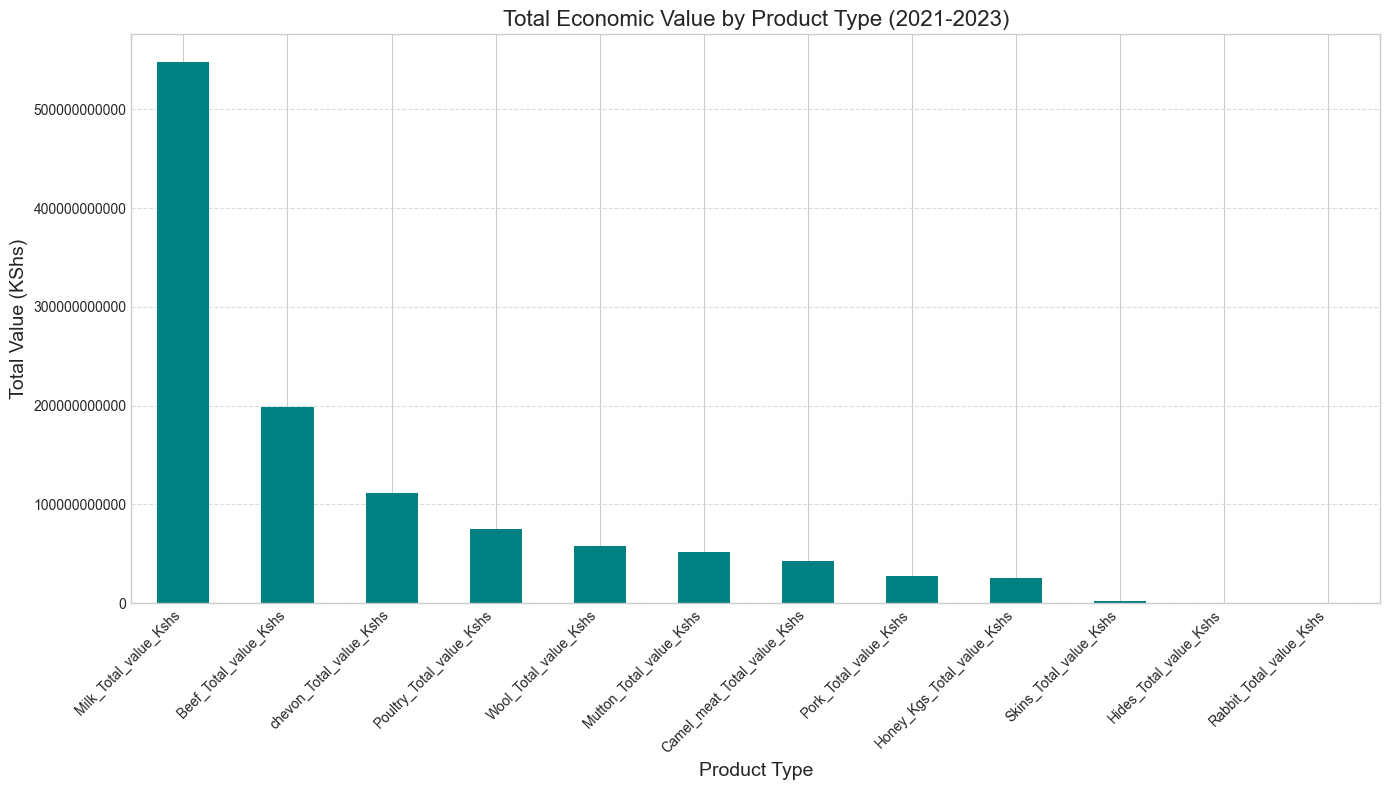

In [24]:
# Analyze economic value by product type
product_value_cols = [col for col in livestock_data_clean.columns if 'Total_value' in col and '_kg' not in col]

# Calculate total value of each product
product_values = livestock_data_clean[product_value_cols].sum().sort_values(ascending=False)

# Create a bar chart of product values
plt.figure(figsize=(14, 8))
product_values.plot(kind='bar', color='teal')
plt.title('Total Economic Value by Product Type (2021-2023)', fontsize=16)
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Total Value (KShs)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
# Calculate production efficiency metrics
efficiency_data = livestock_data_clean.copy()

# Milk production per dairy cow
if 'Milk_kg' in efficiency_data.columns and 'Dairy_Cattle' in efficiency_data.columns:
    efficiency_data['Milk_per_Dairy_Cow'] = efficiency_data['Milk_kg'] / efficiency_data['Dairy_Cattle'].replace(0, np.nan)

# Economic value per animal
if 'Total_Economic_Value' in efficiency_data.columns and 'Total_Livestock' in efficiency_data.columns:
    efficiency_data['Value_per_Animal'] = efficiency_data['Total_Economic_Value'] / efficiency_data['Total_Livestock'].replace(0, np.nan)

# Meat production metrics
if 'Beef_kg' in efficiency_data.columns and 'Beef_Cattle' in efficiency_data.columns:
    efficiency_data['Beef_per_Cattle'] = efficiency_data['Beef_kg'] / efficiency_data['Beef_Cattle'].replace(0, np.nan)

if 'Pork_kg' in efficiency_data.columns and 'pigs' in efficiency_data.columns:
    efficiency_data['Pork_per_Pig'] = efficiency_data['Pork_kg'] / efficiency_data['pigs'].replace(0, np.nan)

# Calculate county-level efficiency metrics
efficiency_by_county = efficiency_data.groupby('County').agg({
    'Milk_per_Dairy_Cow': 'mean',
    'Value_per_Animal': 'mean',
    'Beef_per_Cattle': 'mean',
    'Pork_per_Pig': 'mean',
    'Total_Economic_Value': 'sum'
}).sort_values('Value_per_Animal', ascending=False)

# Display top counties by economic efficiency
print("Top 10 Counties by Value per Animal:")
efficiency_by_county[['Value_per_Animal', 'Total_Economic_Value']].head(10)

Top 10 Counties by Value per Animal:


,Value_per_Animal,Total_Economic_Value
County,,
Tharaka_Nithi,11373.745443,4.376984e+10
Kericho,9819.008850,3.287093e+10
Nyandarua,9159.811311,4.809594e+10
Meru,8039.461407,5.909142e+10
Nandi,7750.637364,2.591508e+10
Uasin_Gishu,7674.473480,3.899147e+10
Nakuru,5086.010164,5.675120e+10
Bomet,5004.882321,2.529380e+10
Trans-Nzoia,4849.218268,2.473085e+10


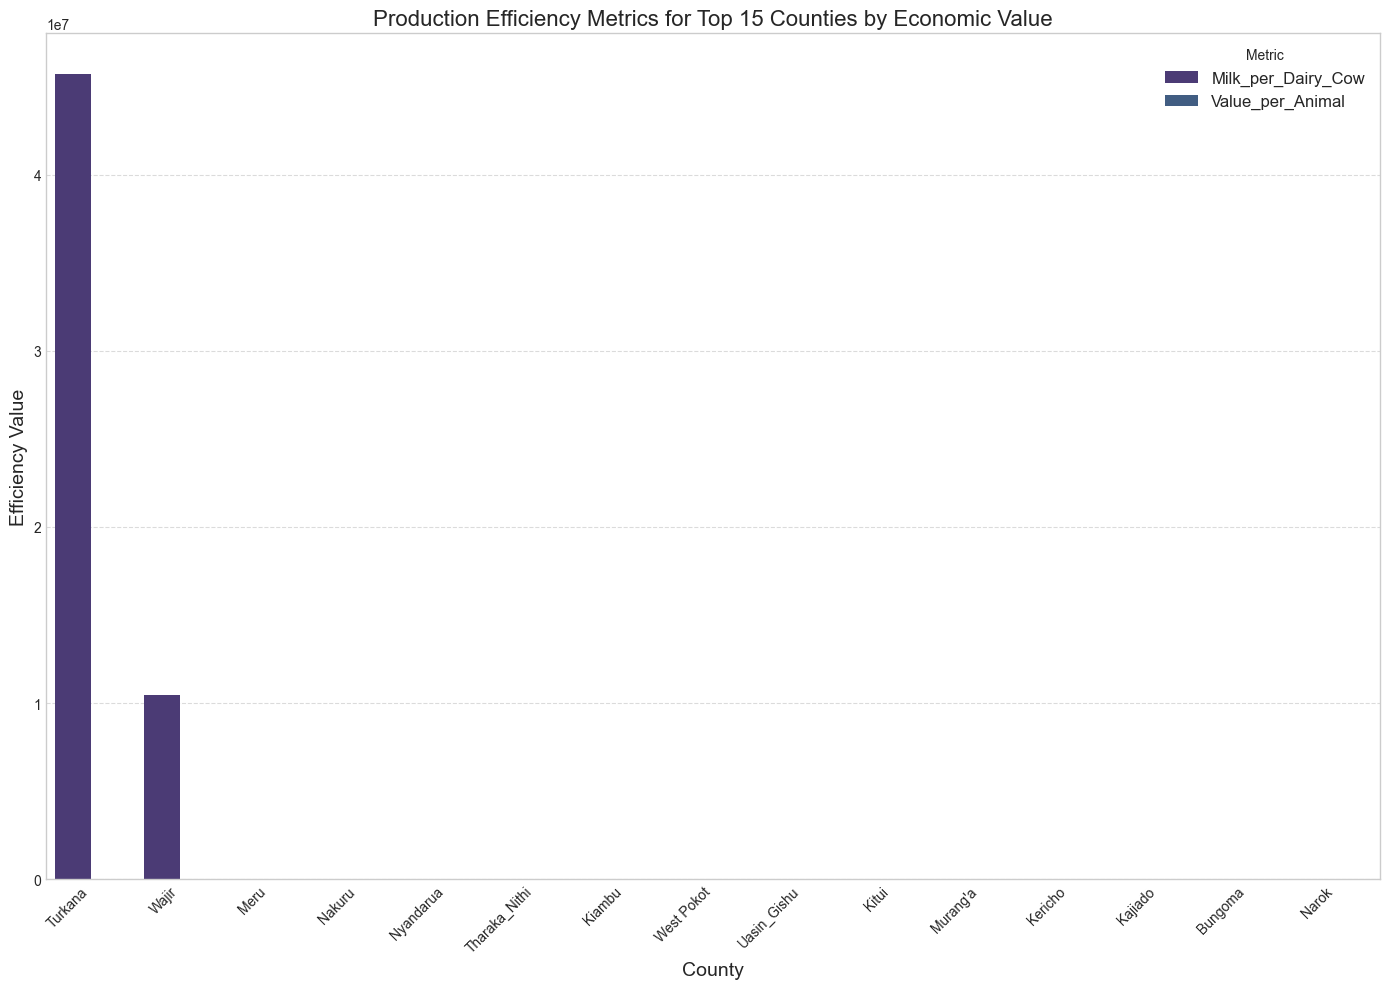

In [26]:
# Create visualization of production efficiency across counties
# Prepare data for top 15 counties by total economic value
top_value_counties = efficiency_by_county.sort_values('Total_Economic_Value', ascending=False).head(15).index.tolist()
top_efficiency_data = efficiency_by_county.loc[top_value_counties, ['Milk_per_Dairy_Cow', 'Value_per_Animal']].reset_index()

# Reshape data for grouped bar chart
efficiency_melted = pd.melt(top_efficiency_data, 
                          id_vars=['County'],
                          value_vars=['Milk_per_Dairy_Cow', 'Value_per_Animal'],
                          var_name='Efficiency_Metric', 
                          value_name='Value')

# Create grouped bar chart
plt.figure(figsize=(14, 10))
sns.barplot(data=efficiency_melted, x='County', y='Value', hue='Efficiency_Metric')
plt.title('Production Efficiency Metrics for Top 15 Counties by Economic Value', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Efficiency Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 9. Interactive Dashboard

Let's create interactive visualizations using Plotly that allow for dynamic exploration of the data, including filters by county, year, and livestock type.

In [27]:
# Create interactive dashboard using Plotly
from IPython.display import display, HTML
import ipywidgets as widgets

# Prepare data for dashboard
dashboard_data = livestock_data_clean.copy()

# Initialize widgets (this is a simplified version - for full dashboard, consider using Dash or Streamlit)
county_options = sorted(dashboard_data['County'].unique())
year_options = sorted(dashboard_data['YEAR'].unique())
livestock_options = ['Dairy_Cattle', 'Beef_Cattle', 'Wool_sheep', 'Hair_sheep', 
                    'Dairy_Goats', 'Meat_Goats', 'pigs', 'Chicken_Indigenous', 
                    'Chicken_layers', 'Chicken_Broilers']

print("In a Jupyter Notebook environment, we can create interactive widgets.")
print("For a full-featured dashboard, consider using frameworks like Dash or Streamlit.")
print("\nExample Dash code for creating an interactive dashboard:")

dashboard_code = '''
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load and prepare data
livestock_data = pd.read_csv('comprehensive_livestock_data.csv')
# ... data cleaning code here ...

# Initialize Dash app
app = dash.Dash(__name__)

# Create app layout
app.layout = html.Div([
    html.H1("Kenya Livestock Data Dashboard"),
    
    # Filters
    html.Div([
        html.Div([
            html.Label("Select County:"),
            dcc.Dropdown(
                id='county-dropdown',
                options=[{'label': county, 'value': county} for county in livestock_data['County'].unique()],
                value=livestock_data['County'].unique()[0]
            ),
        ], style={'width': '30%', 'display': 'inline-block'}),
        
        html.Div([
            html.Label("Select Year:"),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(year), 'value': year} for year in livestock_data['YEAR'].unique()],
                value=livestock_data['YEAR'].max()
            ),
        ], style={'width': '30%', 'display': 'inline-block'}),
        
        html.Div([
            html.Label("Select Livestock Type:"),
            dcc.Dropdown(
                id='livestock-dropdown',
                options=[
                    {'label': 'Dairy Cattle', 'value': 'Dairy_Cattle'},
                    {'label': 'Beef Cattle', 'value': 'Beef_Cattle'},
                    # Add more options...
                ],
                value='Dairy_Cattle'
            ),
        ], style={'width': '30%', 'display': 'inline-block'}),
    ]),
    
    # Visualizations
    html.Div([
        dcc.Graph(id='livestock-trend-chart'),
        dcc.Graph(id='livestock-distribution-chart'),
    ]),
])

# Define callbacks for interactive elements
@app.callback(
    [Output('livestock-trend-chart', 'figure'),
     Output('livestock-distribution-chart', 'figure')],
    [Input('county-dropdown', 'value'),
     Input('year-dropdown', 'value'),
     Input('livestock-dropdown', 'value')]
)
def update_charts(selected_county, selected_year, selected_livestock):
    # Filter data based on selections
    filtered_data = livestock_data[livestock_data['County'] == selected_county]
    
    # Create trend chart
    trend_fig = px.line(
        filtered_data, 
        x='YEAR', 
        y=selected_livestock,
        title=f'{selected_livestock} Trend in {selected_county}'
    )
    
    # Create distribution chart
    distribution_data = livestock_data[livestock_data['YEAR'] == selected_year]
    distribution_fig = px.bar(
        distribution_data.sort_values(selected_livestock, ascending=False).head(10), 
        x='County', 
        y=selected_livestock,
        title=f'Top 10 Counties by {selected_livestock} Population ({selected_year})'
    )
    
    return trend_fig, distribution_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
'''

print(dashboard_code)

In a Jupyter Notebook environment, we can create interactive widgets.
For a full-featured dashboard, consider using frameworks like Dash or Streamlit.

Example Dash code for creating an interactive dashboard:

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load and prepare data
livestock_data = pd.read_csv('comprehensive_livestock_data.csv')
# ... data cleaning code here ...

# Initialize Dash app
app = dash.Dash(__name__)

# Create app layout
app.layout = html.Div([
    html.H1("Kenya Livestock Data Dashboard"),
    
    # Filters
    html.Div([
        html.Div([
            html.Label("Select County:"),
            dcc.Dropdown(
                id='county-dropdown',
                options=[{'label': county, 'value': county} for county in livestock_data['County'].unique()],
                value=livestock_data['County'].unique()[0]
            ),
        ], style={'width': '30%', 'display': 'inlin

In [28]:
# Since we can't run a full Dash app within the notebook, let's create a simplified interactive visualization
# Create a county selector for an interactive plot

# Prepare plot data
counties_to_include = ['Nairobi', 'Nakuru', 'Kiambu', 'Meru', 'Baringo']
plot_data = livestock_data_clean[livestock_data_clean['County'].isin(counties_to_include)]

# Create interactive plot
livestock_type = 'Dairy_Cattle'  # We'll use this as an example

fig = px.bar(
    plot_data, 
    x='County', 
    y=livestock_type,
    color='YEAR',
    barmode='group',
    title=f'{livestock_type} Population by County and Year',
    labels={livestock_type: 'Population', 'County': 'County', 'YEAR': 'Year'}
)

fig.update_layout(
    xaxis_title='County',
    yaxis_title='Population',
    legend_title='Year',
    height=600,
    width=900
)

fig.show()

In [29]:
# Create interactive scatter plot showing relationship between livestock and economic value
fig = px.scatter(
    livestock_data_clean,
    x='Dairy_Cattle',
    y='Total_Economic_Value',
    color='County',
    size='Total_Livestock',
    hover_name='County',
    log_x=True,
    log_y=True,
    title='Relationship Between Dairy Cattle Population and Economic Value',
    labels={'Dairy_Cattle': 'Dairy Cattle Population (log scale)', 
           'Total_Economic_Value': 'Total Economic Value (log scale)'}
)

fig.update_layout(
    height=700,
    width=1000,
    showlegend=False
)

fig.show()

## 10. Key Findings and Recommendations

Based on our analysis, here are the key findings and recommendations for livestock development strategies in Kenya.

### Key Findings

1. **Livestock Distribution**:
   - The analysis reveals significant variations in livestock populations across counties, with some counties specializing in specific livestock types.
   - Indigenous chicken, meat goats, and hair sheep are the most numerous livestock types across Kenya.
   - Dairy cattle, despite not being the most numerous, contribute significantly to economic value.

2. **Economic Value**:
   - Milk production appears to be the most economically valuable livestock product, followed by beef and chevon (goat meat).
   - Counties with higher dairy cattle populations tend to have higher total economic value from livestock.
   - There is a strong positive correlation between dairy cattle population and total economic value.

3. **Efficiency Metrics**:
   - Significant variations exist in production efficiency across counties, suggesting opportunities for improvement through knowledge sharing.
   - Some counties achieve higher milk yields per dairy cow, indicating differences in management practices, genetics, or feed quality.

4. **Temporal Trends**:
   - Livestock populations have shown varying trends across the years, with some types increasing while others decrease.
   - Economic value from livestock has generally increased over the study period, suggesting growth in the sector.

5. **Geographic Patterns**:
   - Highland counties tend to have higher dairy cattle populations and milk production.
   - ASAL (Arid and Semi-Arid Land) counties have larger populations of goats, sheep, and camels, reflecting adaptation to local conditions.

### Recommendations

1. **Targeted Livestock Development Strategies**:
   - Implement region-specific livestock development programs that focus on the livestock types best suited to local conditions.
   - Promote dairy development in high-potential areas while supporting drought-resistant livestock in arid regions.

2. **Efficiency Improvement**:
   - Transfer knowledge and best practices from high-efficiency counties to those with lower productivity.
   - Invest in extension services focusing on animal health, breeding, and nutrition to improve production efficiency.

3. **Value Addition**:
   - Develop local processing facilities for livestock products to capture more value within counties.
   - Support cooperatives and farmer groups to improve market access and bargaining power.

4. **Diversification**:
   - Encourage appropriate livestock diversification to spread risk and maximize use of available resources.
   - Promote integrated crop-livestock systems where suitable.

5. **Data-Driven Decision Making**:
   - Establish robust livestock data collection systems at the county level for better planning.
   - Use predictive analytics to forecast production trends and potential challenges.

6. **Climate Resilience**:
   - Promote climate-smart livestock practices, including water harvesting and conservation.
   - Support research on drought-resistant forage and sustainable grazing management.

7. **Market Development**:
   - Invest in market infrastructure, including collection centers, cold chains, and transportation.
   - Explore export opportunities for high-value livestock products like honey and dairy.

8. **Capacity Building**:
   - Train farmers on modern livestock management practices to improve productivity.
   - Strengthen veterinary services to reduce losses from diseases.

## Conclusion

This analysis provides a comprehensive overview of Kenya's livestock sector, revealing significant variations in livestock populations, production efficiency, and economic value across counties. The data suggests that targeted interventions based on local conditions and strengths could significantly enhance the sector's contribution to food security and economic development.

Future analyses could benefit from more detailed data on production costs, market prices, and environmental impacts to develop even more nuanced strategies for sustainable livestock development.

## 11. Comprehensive Animal-Product Analysis

In this section, we'll analyze the relationship between animal populations and their products, including beef, milk, hides, wool, wax, honey, and other animal products. We'll establish connections between animal populations and their products, calculate production efficiency metrics, and evaluate economic value across all livestock types.

In [30]:
# Define comprehensive animal-product mappings including all livestock products
animal_product_mapping = {
    'Dairy_Cattle': ['Milk_kg', 'Milk_Total_value_Kshs', 'Milk_Unit_price_Kshs', 'Hides_No', 'Hides_Total_value_Kshs'],
    'Beef_Cattle': ['Beef_kg', 'Beef_Total_value_Kshs', 'Beef_Unit_price_Kshs', 'Hides_No', 'Hides_Total_value_Kshs'],
    'Wool_sheep': ['Wool_kg', 'Wool_Total_value_Kshs', 'Wool_Unit_price_Kshs', 'Mutton_kg', 'Mutton_Total_value_Kshs'],
    'Hair_sheep': ['Mutton_kg', 'Mutton_Total_value_Kshs', 'Mutton_Unit_price_Kshs', 'Skins_No', 'Skins_Total_value_Kshs'],
    'Rabbits': ['Rabbit_meat_kg', 'Rabbit_Total_value_Kshs', 'Rabbit_Unit_price_Kshs'],
    'Log_Hives': ['Honey_kg', 'Honey_Kgs_Total_value_Kshs', 'Honey_Kgs_Unit_price_Kshs', 'Wax_kg'],
    'Langstroth_Hives': ['Honey_kg', 'Honey_Kgs_Total_value_Kshs', 'Honey_Kgs_Unit_price_Kshs', 'Wax_kg'],
    'Box_hives': ['Honey_kg', 'Honey_Kgs_Total_value_Kshs', 'Honey_Kgs_Unit_price_Kshs', 'Wax_kg'],
    'pigs': ['Pork_kg', 'Pork_Total_value_Kshs', 'Pork_Unit_price_Kshs'],
    'Meat_Goats': ['chevon_kg', 'chevon_Total_value_Kshs', 'chevon_Unit_price_Kshs', 'Skins_No', 'Skins_Total_value_Kshs'],
    'Dairy_Goats': ['Milk_kg', 'Milk_Total_value_Kshs', 'Milk_Unit_price_Kshs', 'Skins_No', 'Skins_Total_value_Kshs'],
    'Chicken_Indigenous': ['Eggs_Trays', 'Poultry_meat_kg', 'Poultry_Total_value_Kshs', 'Poultry_Unit_price_Kshs'],
    'Chicken_layers': ['Eggs_Trays', 'Poultry_meat_kg', 'Poultry_Total_value_Kshs', 'Poultry_Unit_price_Kshs'],
    'Chicken_Broilers': ['Poultry_meat_kg', 'Poultry_Total_value_Kshs', 'Poultry_Unit_price_Kshs'],
    'Camels': ['Camel_meat_kg', 'Camel_meat_Total_value_Kshs', 'Camel_meat_Unit_price_Kshs', 'Milk_kg', 'Milk_Total_value_Kshs']
}

# Function to check if product columns exist in the dataset
def get_available_product_columns(animal, df):
    if animal not in animal_product_mapping:
        return []
    
    available_cols = []
    for col in animal_product_mapping[animal]:
        if col in df.columns:
            available_cols.append(col)
    
    return available_cols

# Display available animal-product mappings in the dataset
print("Available animal-product mappings in the dataset:")
for animal in animal_product_mapping.keys():
    available_products = get_available_product_columns(animal, livestock_data_clean)
    if len(available_products) > 0:
        print(f"{animal}: {', '.join(available_products)}")

Available animal-product mappings in the dataset:
Dairy_Cattle: Milk_kg, Milk_Total_value_Kshs, Milk_Unit_price_Kshs, Hides_No, Hides_Total_value_Kshs
Beef_Cattle: Beef_kg, Beef_Total_value_Kshs, Beef_Unit_price_Kshs, Hides_No, Hides_Total_value_Kshs
Wool_sheep: Wool_kg, Wool_Total_value_Kshs, Wool_Unit_price_Kshs, Mutton_kg, Mutton_Total_value_Kshs
Hair_sheep: Mutton_kg, Mutton_Total_value_Kshs, Mutton_Unit_price_Kshs, Skins_No, Skins_Total_value_Kshs
Rabbits: Rabbit_meat_kg, Rabbit_Total_value_Kshs, Rabbit_Unit_price_Kshs
Log_Hives: Honey_kg, Honey_Kgs_Total_value_Kshs, Honey_Kgs_Unit_price_Kshs, Wax_kg
Langstroth_Hives: Honey_kg, Honey_Kgs_Total_value_Kshs, Honey_Kgs_Unit_price_Kshs, Wax_kg
Box_hives: Honey_kg, Honey_Kgs_Total_value_Kshs, Honey_Kgs_Unit_price_Kshs, Wax_kg
pigs: Pork_kg, Pork_Total_value_Kshs, Pork_Unit_price_Kshs
Meat_Goats: chevon_kg, chevon_Total_value_Kshs, chevon_Unit_price_Kshs, Skins_No, Skins_Total_value_Kshs
Dairy_Goats: Milk_kg, Milk_Total_value_Kshs, Milk_

In [31]:
# Calculate comprehensive production efficiency metrics for all animal products
animal_product_metrics = livestock_data_clean.copy()

# Milk production per dairy cow
if 'Milk_kg' in animal_product_metrics.columns and 'Dairy_Cattle' in animal_product_metrics.columns:
    animal_product_metrics['Milk_per_Dairy_Cow'] = animal_product_metrics['Milk_kg'] / animal_product_metrics['Dairy_Cattle'].replace(0, np.nan)

# Beef production per beef cattle
if 'Beef_kg' in animal_product_metrics.columns and 'Beef_Cattle' in animal_product_metrics.columns:
    animal_product_metrics['Beef_per_Cattle'] = animal_product_metrics['Beef_kg'] / animal_product_metrics['Beef_Cattle'].replace(0, np.nan)

# Wool production per sheep
if 'Wool_kg' in animal_product_metrics.columns and 'Wool_sheep' in animal_product_metrics.columns:
    animal_product_metrics['Wool_per_Sheep'] = animal_product_metrics['Wool_kg'] / animal_product_metrics['Wool_sheep'].replace(0, np.nan)

# Mutton production per sheep (combined wool and hair sheep)
if 'Mutton_kg' in animal_product_metrics.columns:
    sheep_total = animal_product_metrics['Wool_sheep'].fillna(0) + animal_product_metrics['Hair_sheep'].fillna(0)
    animal_product_metrics['Mutton_per_Sheep'] = animal_product_metrics['Mutton_kg'] / sheep_total.replace(0, np.nan)

# Rabbit meat per rabbit
if 'Rabbit_meat_kg' in animal_product_metrics.columns and 'Rabbits' in animal_product_metrics.columns:
    animal_product_metrics['Rabbit_meat_per_Rabbit'] = animal_product_metrics['Rabbit_meat_kg'] / animal_product_metrics['Rabbits'].replace(0, np.nan)

# Honey per hive (combined hives)
hive_columns = ['Log_Hives', 'Langstroth_Hives', 'Box_hives']
available_hive_cols = [col for col in hive_columns if col in animal_product_metrics.columns]

if 'Honey_kg' in animal_product_metrics.columns and len(available_hive_cols) > 0:
    animal_product_metrics['Total_Hives'] = animal_product_metrics[available_hive_cols].sum(axis=1)
    animal_product_metrics['Honey_per_Hive'] = animal_product_metrics['Honey_kg'] / animal_product_metrics['Total_Hives'].replace(0, np.nan)

# Wax production per hive
if 'Wax_kg' in animal_product_metrics.columns and 'Total_Hives' in animal_product_metrics.columns:
    animal_product_metrics['Wax_per_Hive'] = animal_product_metrics['Wax_kg'] / animal_product_metrics['Total_Hives'].replace(0, np.nan)

# Pork production per pig
if 'Pork_kg' in animal_product_metrics.columns and 'pigs' in animal_product_metrics.columns:
    animal_product_metrics['Pork_per_Pig'] = animal_product_metrics['Pork_kg'] / animal_product_metrics['pigs'].replace(0, np.nan)

# Chevon (goat meat) production per meat goat
if 'chevon_kg' in animal_product_metrics.columns and 'Meat_Goats' in animal_product_metrics.columns:
    animal_product_metrics['Chevon_per_Meat_Goat'] = animal_product_metrics['chevon_kg'] / animal_product_metrics['Meat_Goats'].replace(0, np.nan)

# Camel meat per camel
if 'Camel_meat_kg' in animal_product_metrics.columns and 'Camels' in animal_product_metrics.columns:
    animal_product_metrics['Camel_meat_per_Camel'] = animal_product_metrics['Camel_meat_kg'] / animal_product_metrics['Camels'].replace(0, np.nan)

# Calculate economic value per animal for all products
if 'Milk_Total_value_Kshs' in animal_product_metrics.columns and 'Dairy_Cattle' in animal_product_metrics.columns:
    animal_product_metrics['Milk_Value_per_Dairy_Cow'] = animal_product_metrics['Milk_Total_value_Kshs'] / animal_product_metrics['Dairy_Cattle'].replace(0, np.nan)

if 'Beef_Total_value_Kshs' in animal_product_metrics.columns and 'Beef_Cattle' in animal_product_metrics.columns:
    animal_product_metrics['Beef_Value_per_Cattle'] = animal_product_metrics['Beef_Total_value_Kshs'] / animal_product_metrics['Beef_Cattle'].replace(0, np.nan)

if 'Wool_Total_value_Kshs' in animal_product_metrics.columns and 'Wool_sheep' in animal_product_metrics.columns:
    animal_product_metrics['Wool_Value_per_Sheep'] = animal_product_metrics['Wool_Total_value_Kshs'] / animal_product_metrics['Wool_sheep'].replace(0, np.nan)

if 'Mutton_Total_value_Kshs' in animal_product_metrics.columns:
    animal_product_metrics['Mutton_Value_per_Sheep'] = animal_product_metrics['Mutton_Total_value_Kshs'] / sheep_total.replace(0, np.nan)

if 'Rabbit_Total_value_Kshs' in animal_product_metrics.columns and 'Rabbits' in animal_product_metrics.columns:
    animal_product_metrics['Rabbit_Value_per_Rabbit'] = animal_product_metrics['Rabbit_Total_value_Kshs'] / animal_product_metrics['Rabbits'].replace(0, np.nan)

if 'Honey_Kgs_Total_value_Kshs' in animal_product_metrics.columns and 'Total_Hives' in animal_product_metrics.columns:
    animal_product_metrics['Honey_Value_per_Hive'] = animal_product_metrics['Honey_Kgs_Total_value_Kshs'] / animal_product_metrics['Total_Hives'].replace(0, np.nan)

if 'Pork_Total_value_Kshs' in animal_product_metrics.columns and 'pigs' in animal_product_metrics.columns:
    animal_product_metrics['Pork_Value_per_Pig'] = animal_product_metrics['Pork_Total_value_Kshs'] / animal_product_metrics['pigs'].replace(0, np.nan)

if 'chevon_Total_value_Kshs' in animal_product_metrics.columns and 'Meat_Goats' in animal_product_metrics.columns:
    animal_product_metrics['Chevon_Value_per_Meat_Goat'] = animal_product_metrics['chevon_Total_value_Kshs'] / animal_product_metrics['Meat_Goats'].replace(0, np.nan)

if 'Camel_meat_Total_value_Kshs' in animal_product_metrics.columns and 'Camels' in animal_product_metrics.columns:
    animal_product_metrics['Camel_Value_per_Camel'] = animal_product_metrics['Camel_meat_Total_value_Kshs'] / animal_product_metrics['Camels'].replace(0, np.nan)

# Display summary statistics for production efficiency metrics
efficiency_metrics = [
    'Milk_per_Dairy_Cow', 'Beef_per_Cattle', 'Wool_per_Sheep', 'Mutton_per_Sheep',
    'Rabbit_meat_per_Rabbit', 'Honey_per_Hive', 'Wax_per_Hive', 'Pork_per_Pig', 
    'Chevon_per_Meat_Goat', 'Camel_meat_per_Camel'
]

value_metrics = [
    'Milk_Value_per_Dairy_Cow', 'Beef_Value_per_Cattle', 'Wool_Value_per_Sheep', 
    'Mutton_Value_per_Sheep', 'Rabbit_Value_per_Rabbit', 'Honey_Value_per_Hive',
    'Pork_Value_per_Pig', 'Chevon_Value_per_Meat_Goat', 'Camel_Value_per_Camel'
]

available_efficiency_metrics = [metric for metric in efficiency_metrics if metric in animal_product_metrics.columns]
available_value_metrics = [metric for metric in value_metrics if metric in animal_product_metrics.columns]

print("Summary statistics for production efficiency metrics:")
if available_efficiency_metrics:
    display(animal_product_metrics[available_efficiency_metrics].describe())
else:
    print("No efficiency metrics available in the dataset")

print("\nSummary statistics for economic value per animal:")
if available_value_metrics:
    display(animal_product_metrics[available_value_metrics].describe())
else:
    print("No value metrics available in the dataset")

Summary statistics for production efficiency metrics:


,Milk_per_Dairy_Cow,Beef_per_Cattle,Wool_per_Sheep,Mutton_per_Sheep,Rabbit_meat_per_Rabbit,Honey_per_Hive,Wax_per_Hive,Pork_per_Pig,Chevon_per_Meat_Goat,Camel_meat_per_Camel
count,7.900000e+01,79.000000,19.000000,78.000000,66.000000,36.000000,35.000000,68.000000,79.000000,26.000000
mean,8.783489e+05,33.401694,1980.373744,3.733587,1.022963,78.816781,12.021883,46.412529,14.986330,59.426817
std,5.390297e+06,61.014487,4897.594843,6.761264,1.088321,352.759603,40.964352,52.974573,42.441989,244.160738
min,2.189987e+02,0.027372,0.037493,0.217375,0.014184,0.496098,0.009630,1.124801,0.015941,0.208865
25%,6.592290e+02,10.814082,0.673841,1.648951,0.351372,10.356755,0.857395,23.052644,1.783030,2.639841
50%,9.432218e+02,15.480959,2.332317,2.360912,0.811697,16.181799,1.549618,42.850532,2.885810,8.560162
75%,2.144296e+03,24.246078,1032.305155,3.693505,1.059002,28.475933,2.726114,52.491670,5.059808,13.745901
max,4.572520e+07,351.787910,15828.236713,53.293310,4.500000,2134.106667,213.413333,414.188834,253.352449,1254.567314



Summary statistics for economic value per animal:


,Milk_Value_per_Dairy_Cow,Beef_Value_per_Cattle,Wool_Value_per_Sheep,Mutton_Value_per_Sheep,Rabbit_Value_per_Rabbit,Honey_Value_per_Hive,Pork_Value_per_Pig,Chevon_Value_per_Meat_Goat,Camel_Value_per_Camel
count,7.900000e+01,79.000000,19.000000,78.000000,66.000000,7.900000e+01,68.000000,79.000000,26.000000
mean,8.754614e+07,17775.983420,89904.529253,2173.589928,539.118839,3.655179e+04,24929.564889,8639.833846,24693.166649
std,5.454203e+08,34717.657176,224861.901037,3455.037049,646.607230,1.375831e+05,29122.700854,24420.422427,97493.040073
min,9.235180e+03,13.685900,1.124801,130.425244,9.465721,3.554688e+02,562.400636,9.564475,135.762374
25%,3.506275e+04,5628.012705,52.221452,934.054886,134.861844,8.940205e+03,12218.612235,927.885245,1544.222957
50%,5.277133e+04,7867.830530,320.057990,1427.884212,342.869191,1.476350e+04,19362.216508,1751.248731,3450.413638
75%,1.656328e+05,12202.146754,47540.436191,2272.669316,549.003797,2.509411e+04,28324.257464,3553.385643,8066.922269
max,4.637842e+09,211072.745902,791411.835645,23981.989548,3425.600185,1.226667e+06,208014.836471,139931.544969,501826.925765


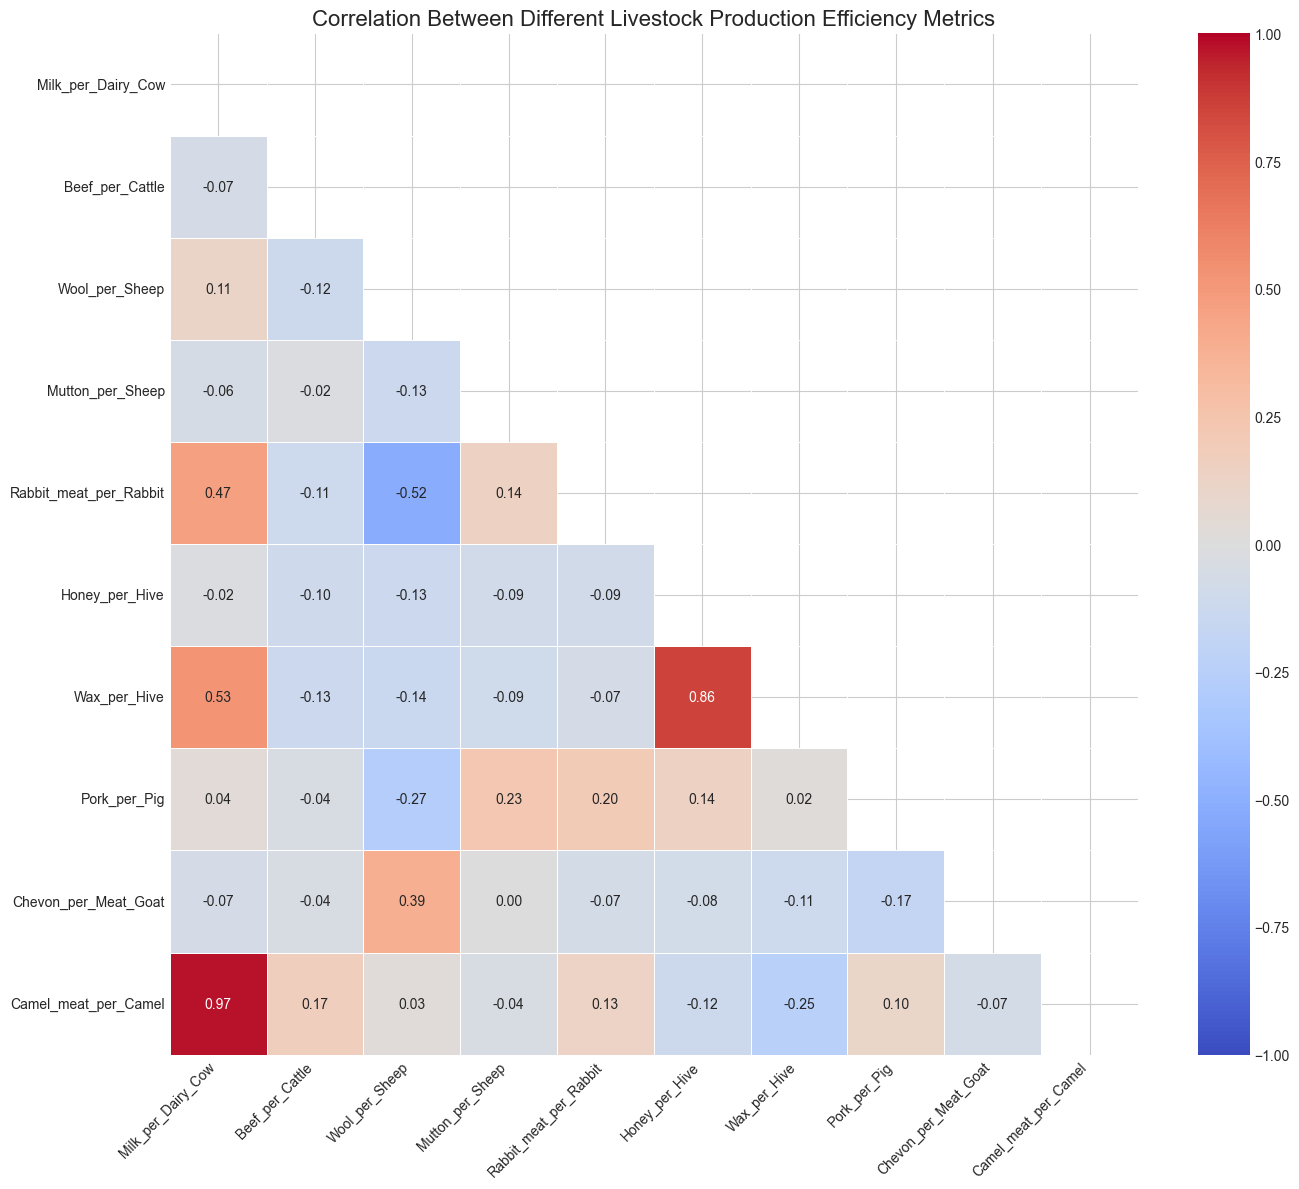

In [32]:
# Visualize efficiency metrics with proper error handling
try:
    # Calculate county-level efficiency metrics for major products
    county_efficiency = animal_product_metrics.groupby('County')[available_efficiency_metrics].mean().dropna(how='all')
    
    # Create correlation heatmap of efficiency metrics
    if len(available_efficiency_metrics) > 1:
        plt.figure(figsize=(14, 12))
        efficiency_corr = county_efficiency[available_efficiency_metrics].corr()
        mask = np.triu(np.ones_like(efficiency_corr, dtype=bool))
        
        sns.heatmap(efficiency_corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
                   linewidths=0.5, vmin=-1, vmax=1)
        plt.title('Correlation Between Different Livestock Production Efficiency Metrics', fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"Error creating correlation heatmap: {e}")
    print("Insufficient data for correlation analysis between efficiency metrics.")

In [33]:
# Identify top counties for each production efficiency metric
try:
    top_counties_by_metric = {}
    display_metrics = []
    
    # For each metric, find top 10 counties
    for metric in available_efficiency_metrics:
        # Skip metrics with insufficient data
        if county_efficiency[metric].count() < 5:
            continue
            
        metric_data = county_efficiency.sort_values(metric, ascending=False)[[metric]].head(10)
        if not metric_data.empty:
            top_counties_by_metric[metric] = metric_data
            display_metrics.append(metric)
    
    # Display results for each metric
    for metric in display_metrics:
        print(f"\nTop 10 Counties by {metric.replace('_', ' ')}:")
        display(top_counties_by_metric[metric])
except Exception as e:
    print(f"Error identifying top counties: {e}")
    print("Insufficient data to identify top counties for efficiency metrics.")


Top 10 Counties by Milk per Dairy Cow:


,Milk_per_Dairy_Cow
County,
Turkana,4.572520e+07
Wajir,1.045692e+07
Garissa,7.999147e+05
Tana_River,5.784044e+05
Marsabit,1.241115e+05
Mandera,1.085139e+05
Isiolo,8.934971e+03
Samburu,7.682107e+03
Kwale,3.374819e+03



Top 10 Counties by Beef per Cattle:


,Beef_per_Cattle
County,
Nyeri,351.787910
Trans-Nzoia,273.032190
Murang'a,171.809728
Nyandarua,138.091723
Uasin_Gishu,80.524621
Kirinyaga,68.976937
Kilifi,28.283185
Kericho,27.743468
Tharaka_Nithi,26.555609



Top 10 Counties by Wool per Sheep:


,Wool_per_Sheep
County,
Nandi,15693.113990
Kericho,7914.319423
Baringo,1103.232839
Bomet,762.513514
Nakuru,598.792415
Nyandarua,435.565381
Elgeyo_Marakwet,146.822477
Laikipia,5.359395
Bungoma,2.332317



Top 10 Counties by Mutton per Sheep:


,Mutton_per_Sheep
County,
Kilifi,53.293310
Bomet,15.072014
Bungoma,11.133648
Lamu,6.253209
Kisii,5.004976
Nyamira,4.885267
Kwale,4.592559
Uasin_Gishu,4.394818
Mombasa,4.164218



Top 10 Counties by Rabbit meat per Rabbit:


,Rabbit_meat_per_Rabbit
County,
Meru,4.500000
Tana_River,4.048649
Kwale,3.778562
Kitui,2.815786
Laikipia,2.058414
Kilifi,1.858495
Bungoma,1.289357
Mombasa,1.190179
Bomet,1.106918



Top 10 Counties by Honey per Hive:


,Honey_per_Hive
County,
Mandera,2134.106667
Bomet,74.490205
Nairobi,73.664122
Turkana,43.793632
Kisii,43.141797
Migori,31.831142
Homa Bay,31.398706
Nyamira,30.194131
Siaya,29.946585



Top 10 Counties by Wax per Hive:


,Wax_per_Hive
County,
Mandera,213.413333
Machakos,125.965936
Bomet,18.622551
Kisii,15.460282
Kitui,5.168478
Nairobi,3.684478
Homa Bay,3.139913
Kirinyaga,2.939128
Kisumu,2.818884



Top 10 Counties by Pork per Pig:


,Pork_per_Pig
County,
Bungoma,219.030432
Kajiado,102.380106
Kitui,71.833606
Kilifi,64.544049
Bomet,64.468862
Samburu,64.100815
Trans-Nzoia,58.788045
Murang'a,56.713637
Kwale,55.975777



Top 10 Counties by Chevon per Meat Goat:


,Chevon_per_Meat_Goat
County,
Vihiga,230.046288
Tharaka_Nithi,127.624943
Mombasa,73.812846
Nyandarua,43.002545
Kericho,31.311755
Bomet,30.578099
Kirinyaga,26.691046
Nandi,22.290020
Nyamira,15.410775



Top 10 Counties by Camel meat per Camel:


,Camel_meat_per_Camel
County,
Turkana,633.163173
Kwale,58.326217
Elgeyo_Marakwet,28.965287
Wajir,20.009533
Kajiado,15.678431
Machakos,14.660714
Samburu,9.917844
Baringo,9.138574
Isiolo,8.212071


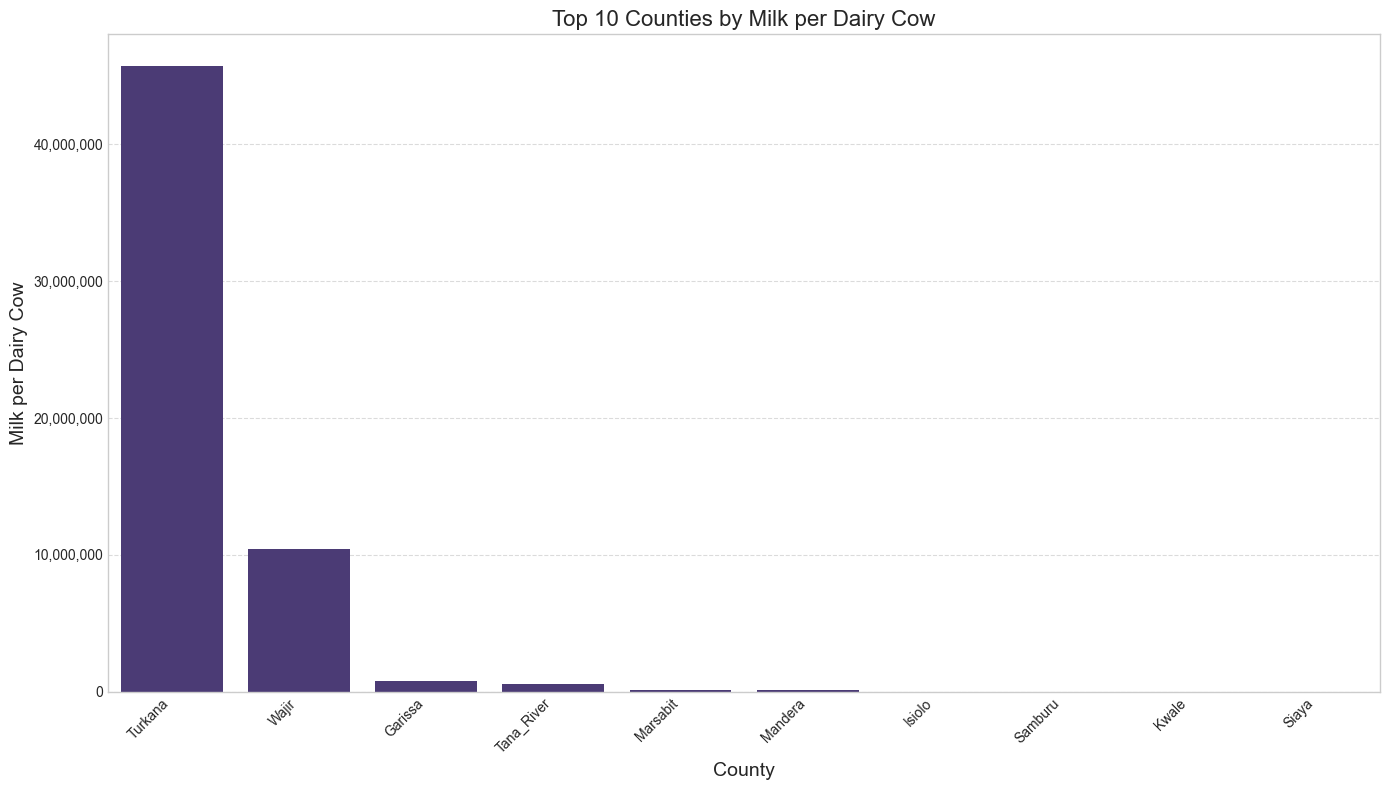

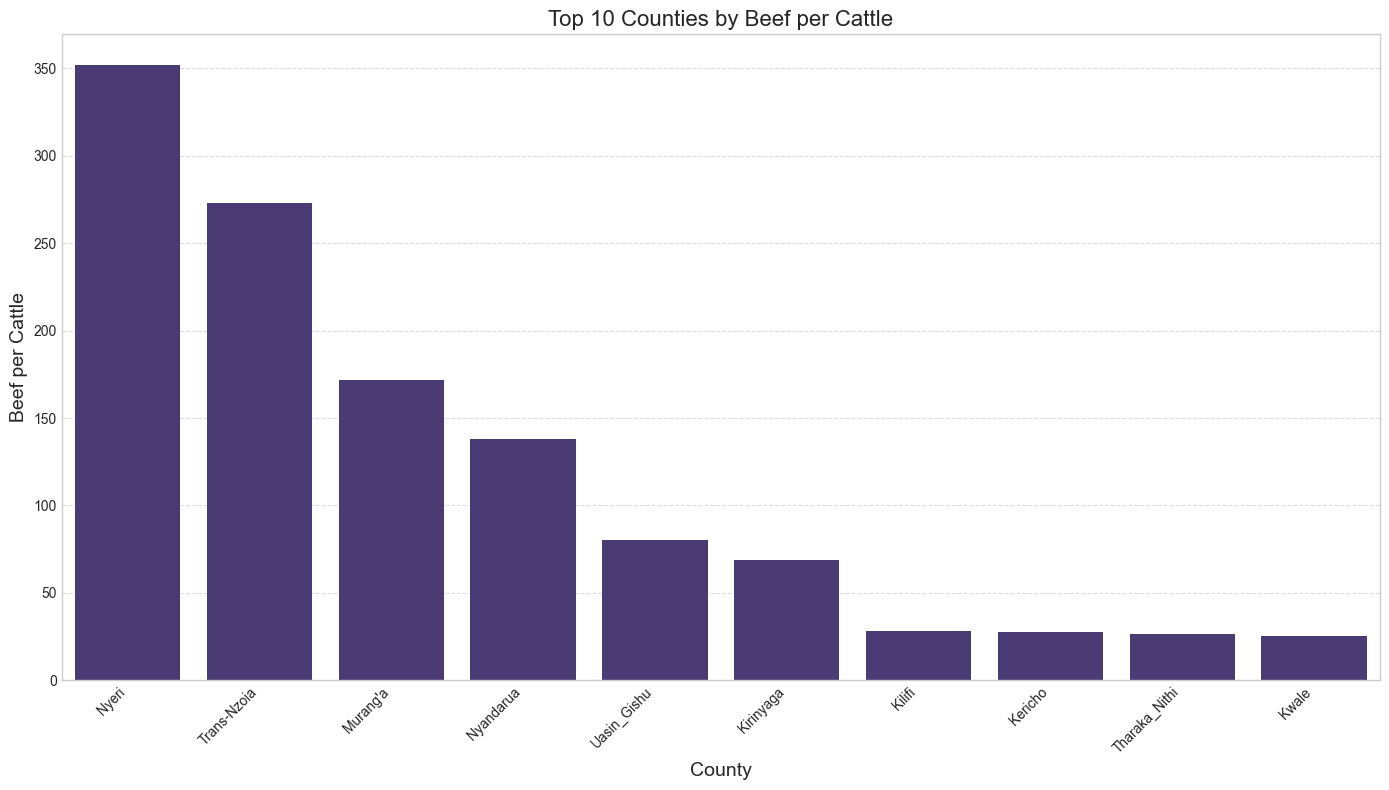

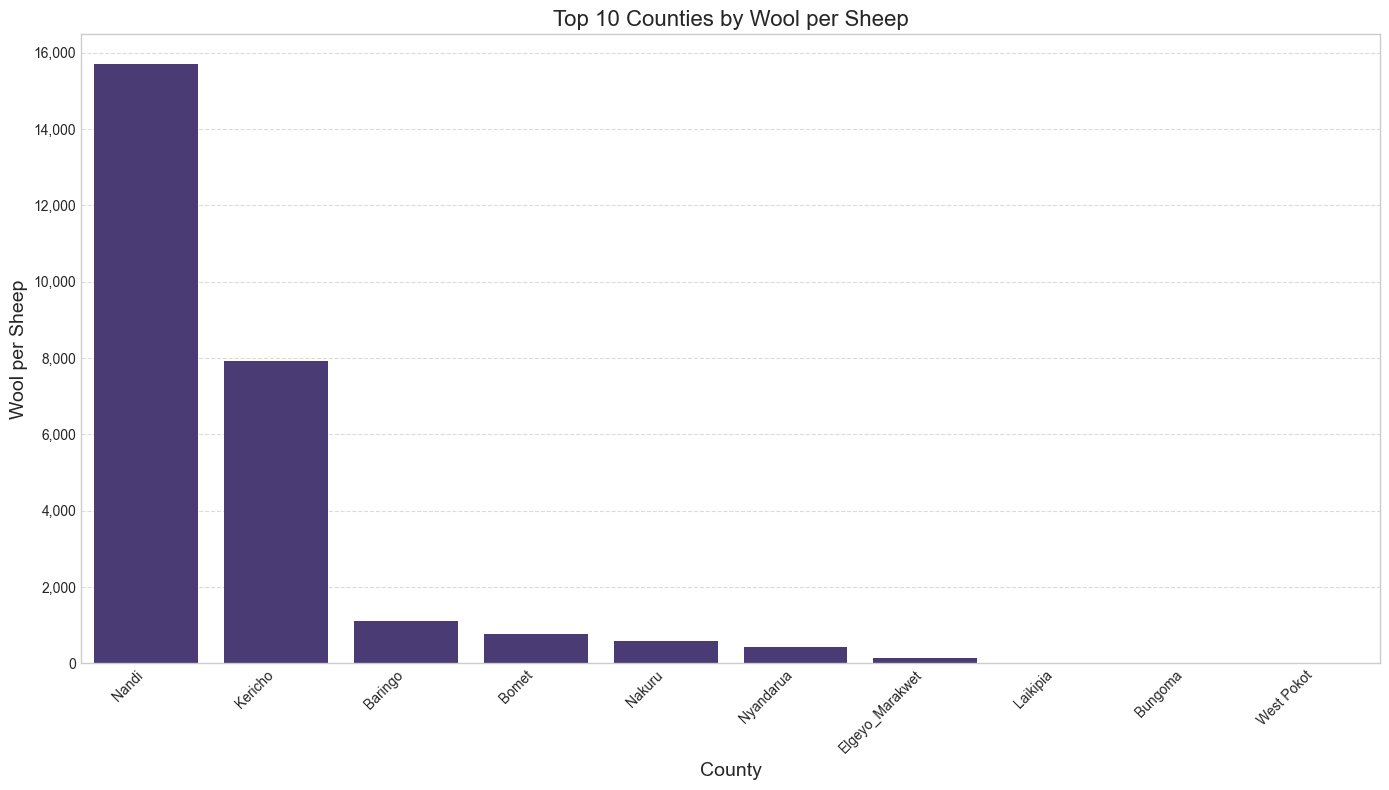

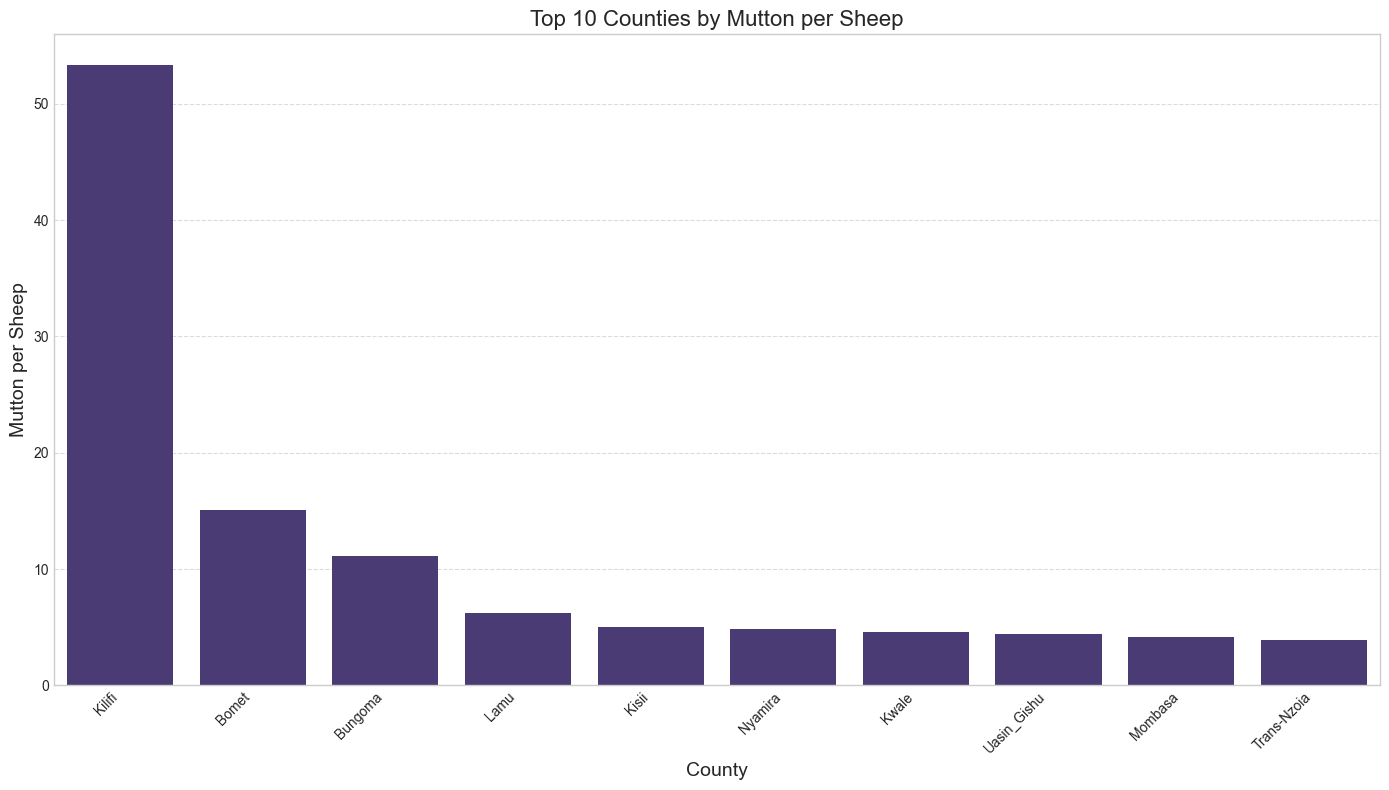

In [34]:
# Create visualizations for production efficiency across top counties
try:
    # Choose top metrics to visualize (with sufficient data)
    metrics_to_plot = [m for m in display_metrics if m in top_counties_by_metric and len(top_counties_by_metric[m]) >= 5]
    
    if metrics_to_plot:
        for metric in metrics_to_plot[:4]:  # Limit to 4 plots for brevity
            # Get data and prepare plot
            plot_data = top_counties_by_metric[metric].reset_index()
            
            plt.figure(figsize=(14, 8))
            ax = sns.barplot(data=plot_data, x='County', y=metric)
            
            # Format labels
            title = metric.replace('_', ' ')
            plt.title(f'Top 10 Counties by {title}', fontsize=16)
            plt.xlabel('County', fontsize=14)
            plt.ylabel(title, fontsize=14)
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            # Format y-axis to avoid scientific notation
            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
            
            plt.tight_layout()
            plt.show()
    else:
        print("Insufficient data to create visualizations for efficiency metrics")
except Exception as e:
    print(f"Error creating production efficiency visualizations: {e}")
    print("Check your data or try reducing the number of plots.")

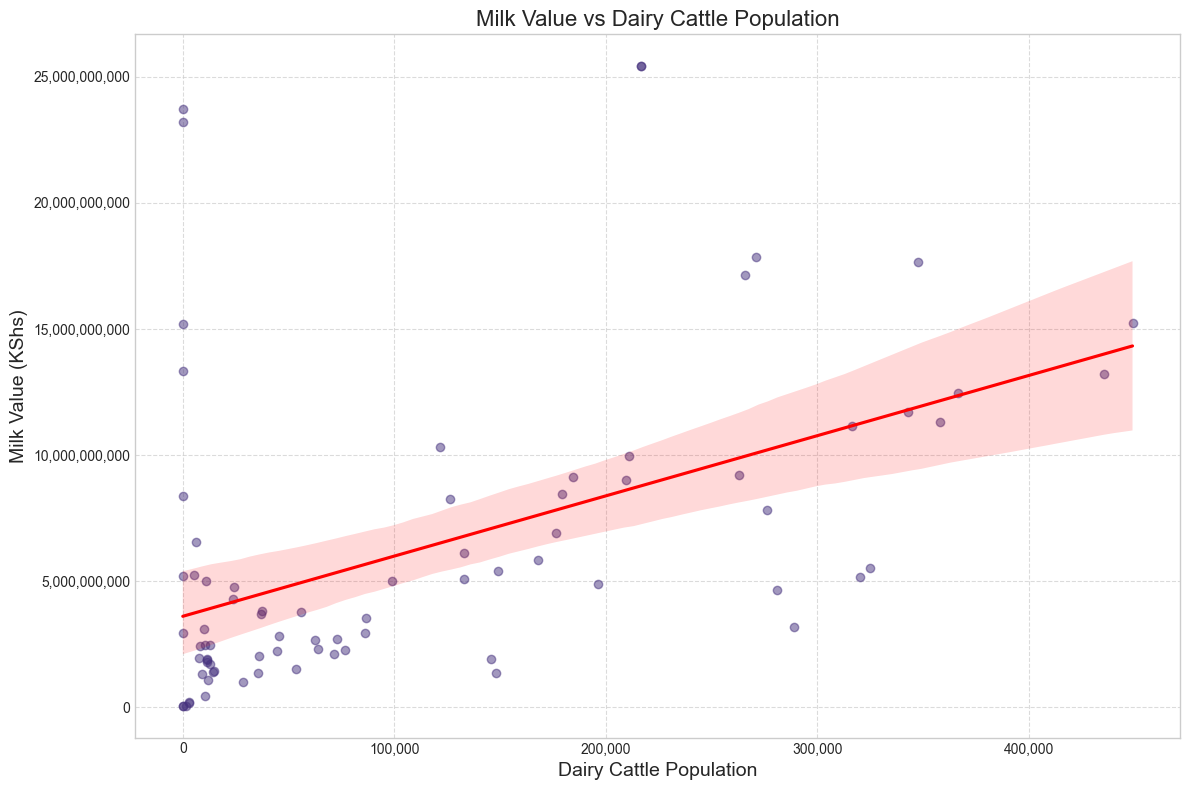

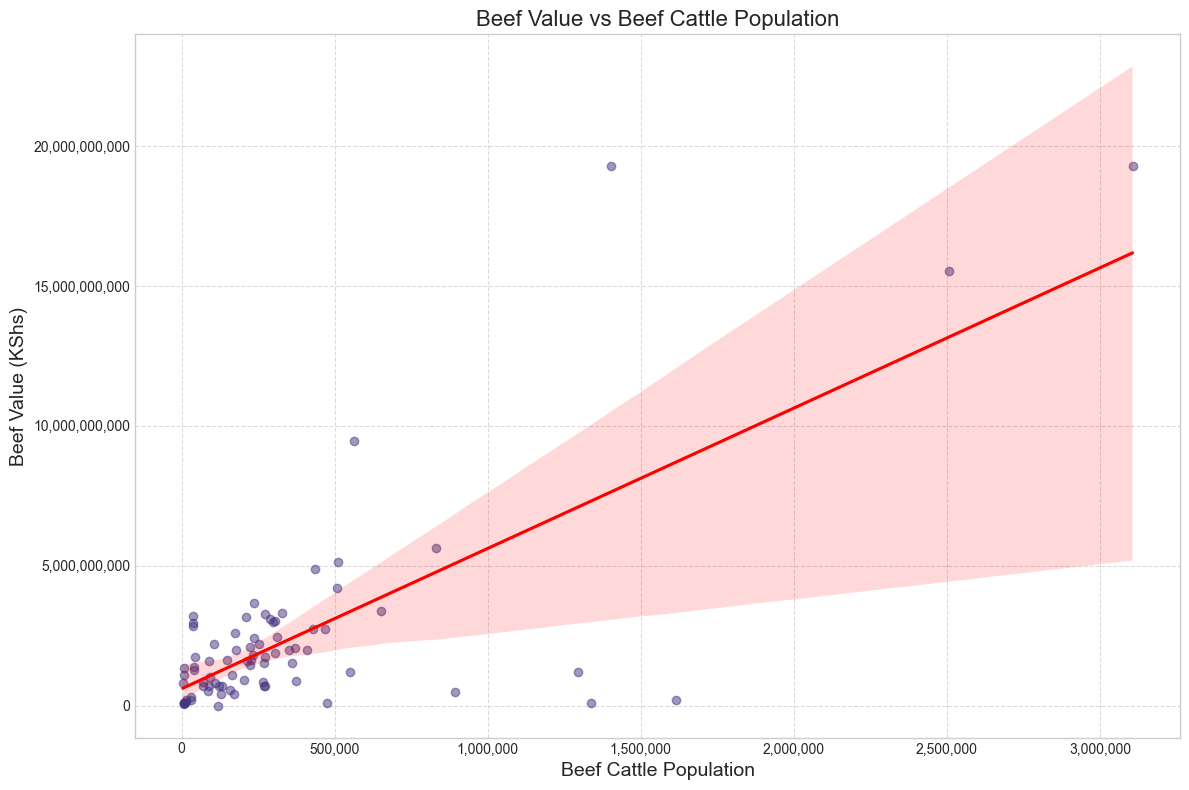

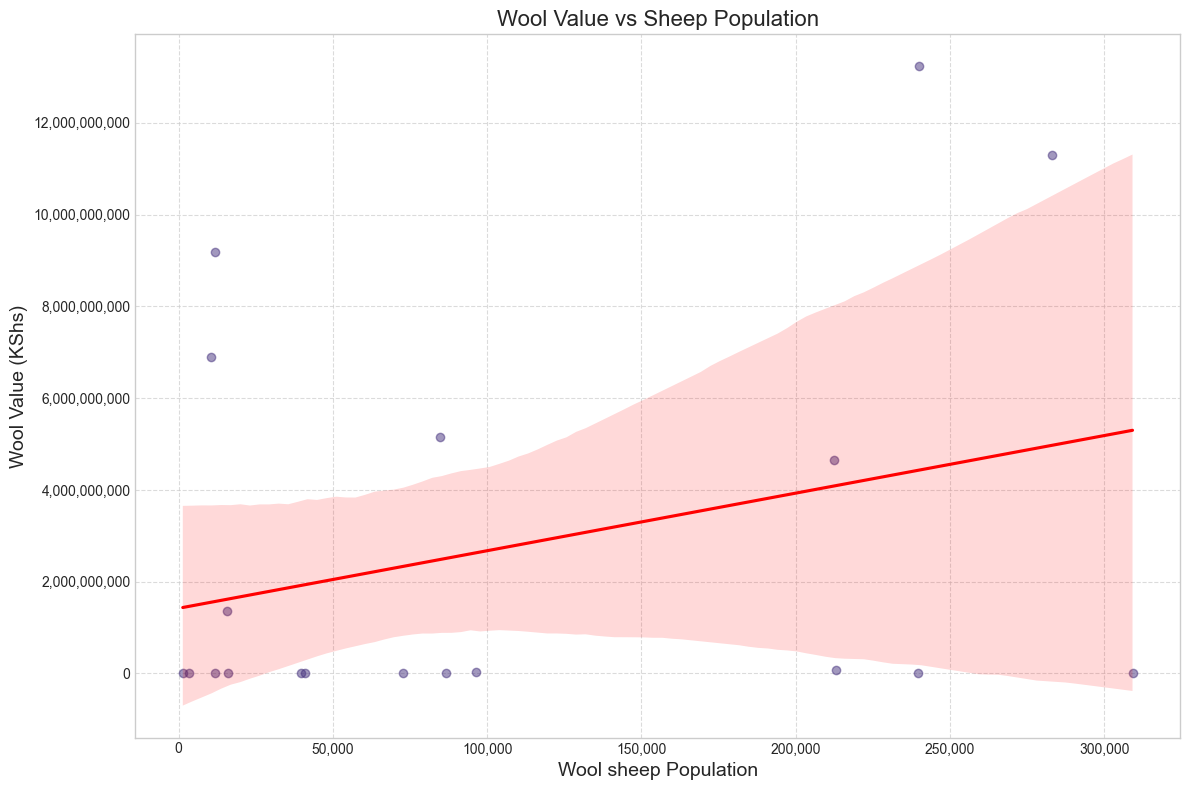

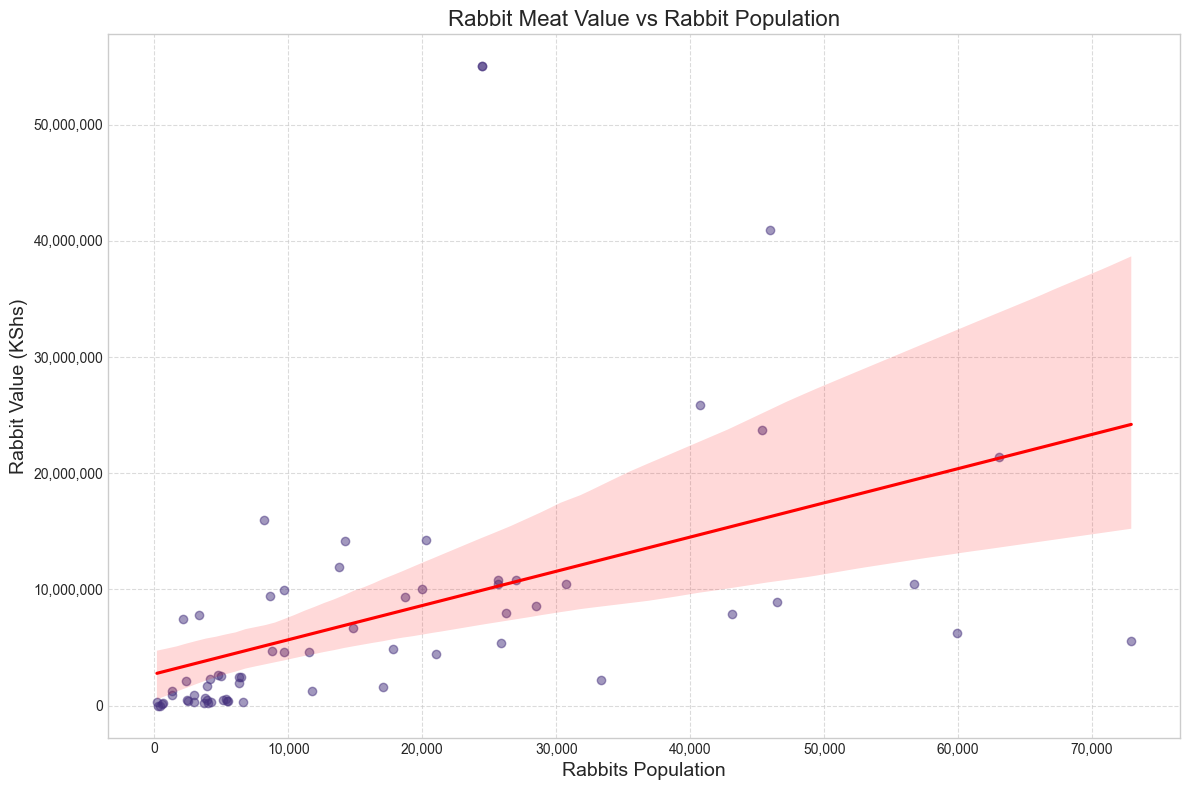

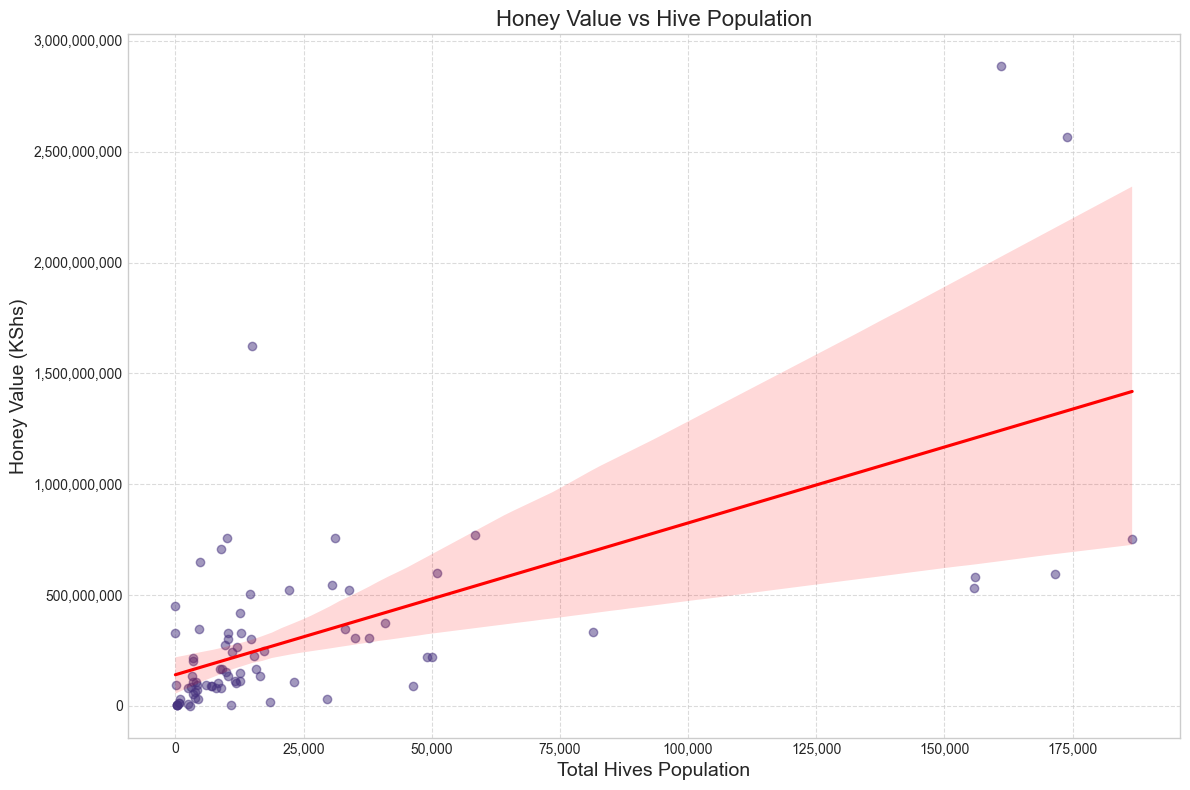

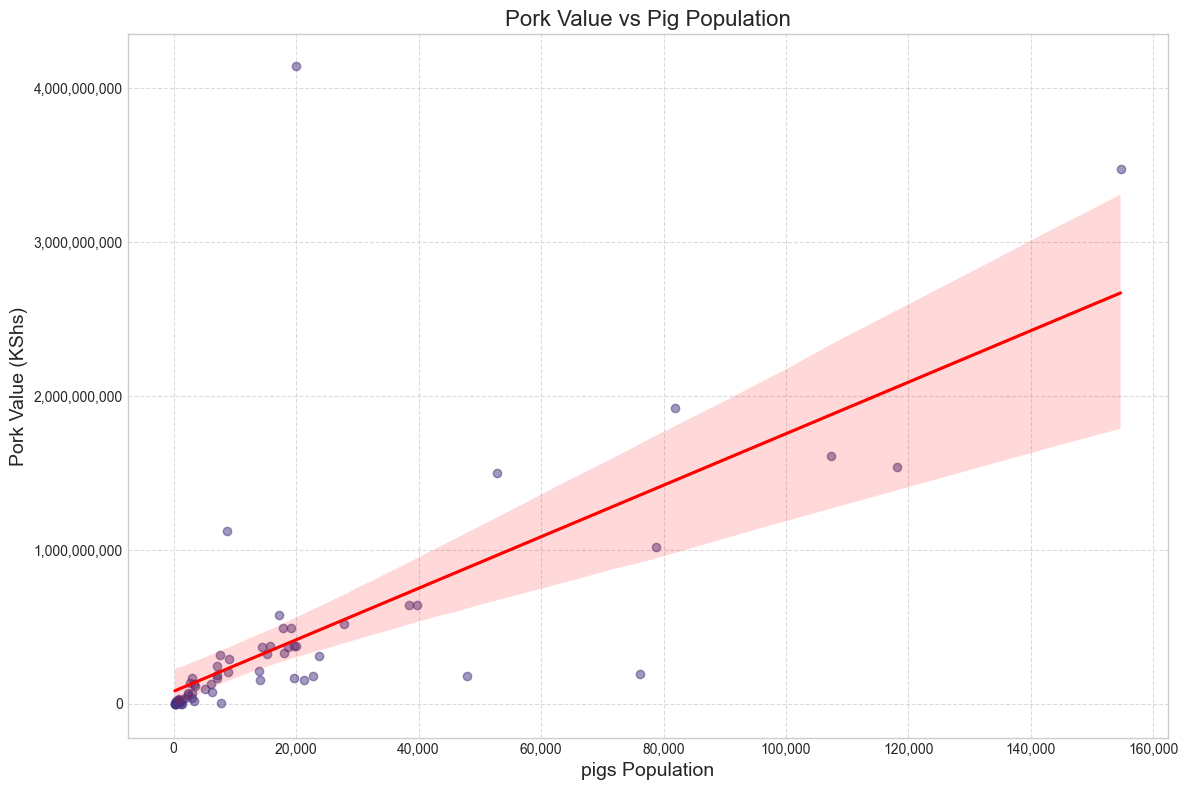

In [35]:
# Create scatter plots to analyze relationship between animal population and product value
try:
    # Define pairs of animal populations and their product values to analyze
    animal_product_pairs = [
        ('Dairy_Cattle', 'Milk_Total_value_Kshs', 'Milk Value vs Dairy Cattle Population'),
        ('Beef_Cattle', 'Beef_Total_value_Kshs', 'Beef Value vs Beef Cattle Population'),
        ('Wool_sheep', 'Wool_Total_value_Kshs', 'Wool Value vs Sheep Population'),
        ('Rabbits', 'Rabbit_Total_value_Kshs', 'Rabbit Meat Value vs Rabbit Population'),
        ('Total_Hives', 'Honey_Kgs_Total_value_Kshs', 'Honey Value vs Hive Population'),
        ('pigs', 'Pork_Total_value_Kshs', 'Pork Value vs Pig Population'),
        ('Meat_Goats', 'chevon_Total_value_Kshs', 'Chevon Value vs Meat Goat Population'),
        ('Camels', 'Camel_meat_Total_value_Kshs', 'Camel Meat Value vs Camel Population')
    ]
    
    # Get pairs with available data
    valid_pairs = [pair for pair in animal_product_pairs 
                  if pair[0] in animal_product_metrics.columns 
                  and pair[1] in animal_product_metrics.columns 
                  and animal_product_metrics[pair[0]].notna().sum() > 10 
                  and animal_product_metrics[pair[1]].notna().sum() > 10]
    
    # Select a subset of pairs to avoid too many plots
    pairs_to_plot = valid_pairs[:6]
    
    for animal, product_value, title in pairs_to_plot:
        # Filter out rows with missing values
        plot_data = animal_product_metrics[[animal, product_value]].dropna()
        
        if len(plot_data) > 5:  # Ensure enough data points
            plt.figure(figsize=(12, 8))
            
            # Create scatter plot with regression line
            ax = sns.regplot(
                x=animal, 
                y=product_value, 
                data=plot_data,
                scatter_kws={'alpha':0.5},
                line_kws={'color':'red'}
            )
            
            plt.title(title, fontsize=16)
            plt.xlabel(f'{animal.replace("_", " ")} Population', fontsize=14)
            plt.ylabel(f'{product_value.split("_")[0]} Value (KShs)', fontsize=14)
            
            # Format axes to avoid scientific notation
            ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
            
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
except Exception as e:
    print(f"Error creating scatter plots: {e}")
    print("Check your data or reduce the number of plots.")

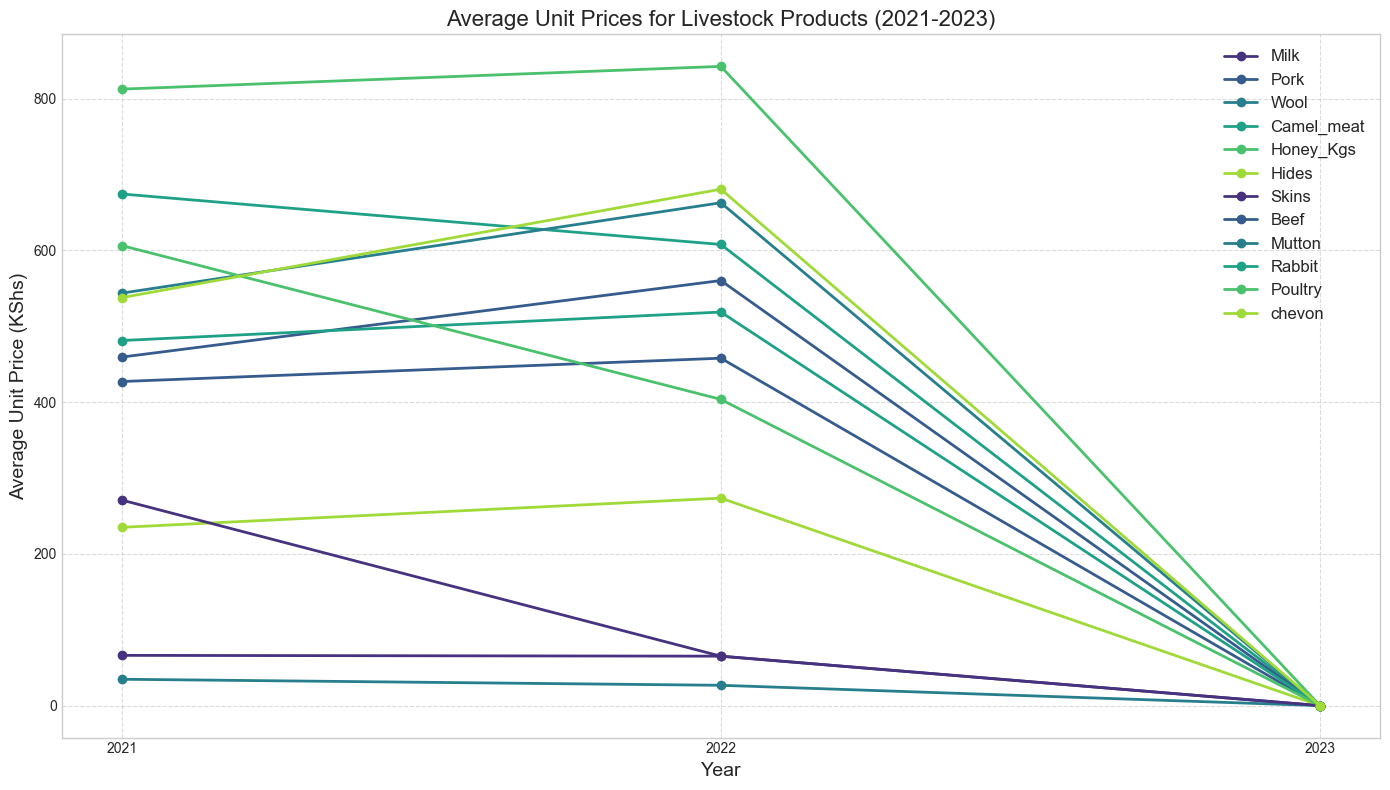

In [36]:
# Analyze price trends for all products across years
try:
    # Get all unit price columns
    price_columns = [col for col in animal_product_metrics.columns if 'Unit_price_Kshs' in col]
    
    # Check if there's sufficient data for trend analysis
    if price_columns and len(animal_product_metrics['YEAR'].unique()) > 1:
        # Calculate average prices by year
        yearly_prices = animal_product_metrics.groupby('YEAR')[price_columns].mean()
        
        # Filter columns with sufficient data for visualization
        cols_to_plot = [col for col in price_columns if yearly_prices[col].notna().sum() > 1]
        
        if cols_to_plot:
            # Create line plot for price trends
            plt.figure(figsize=(14, 8))
            
            for col in cols_to_plot:
                if yearly_prices[col].notna().sum() > 1:  # Need at least 2 data points for line
                    plt.plot(yearly_prices.index, yearly_prices[col].fillna(0), 
                            marker='o', linewidth=2, 
                            label=col.replace('_Unit_price_Kshs', ''))
            
            plt.title('Average Unit Prices for Livestock Products (2021-2023)', fontsize=16)
            plt.xlabel('Year', fontsize=14)
            plt.ylabel('Average Unit Price (KShs)', fontsize=14)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend(fontsize=12)
            plt.xticks(yearly_prices.index)
            plt.tight_layout()
            plt.show()
        else:
            print("Insufficient price data across years for trend visualization")
    else:
        print("Insufficient data for price trend analysis")
except Exception as e:
    print(f"Error analyzing price trends: {e}")
    print("Check if you have price data across multiple years.")

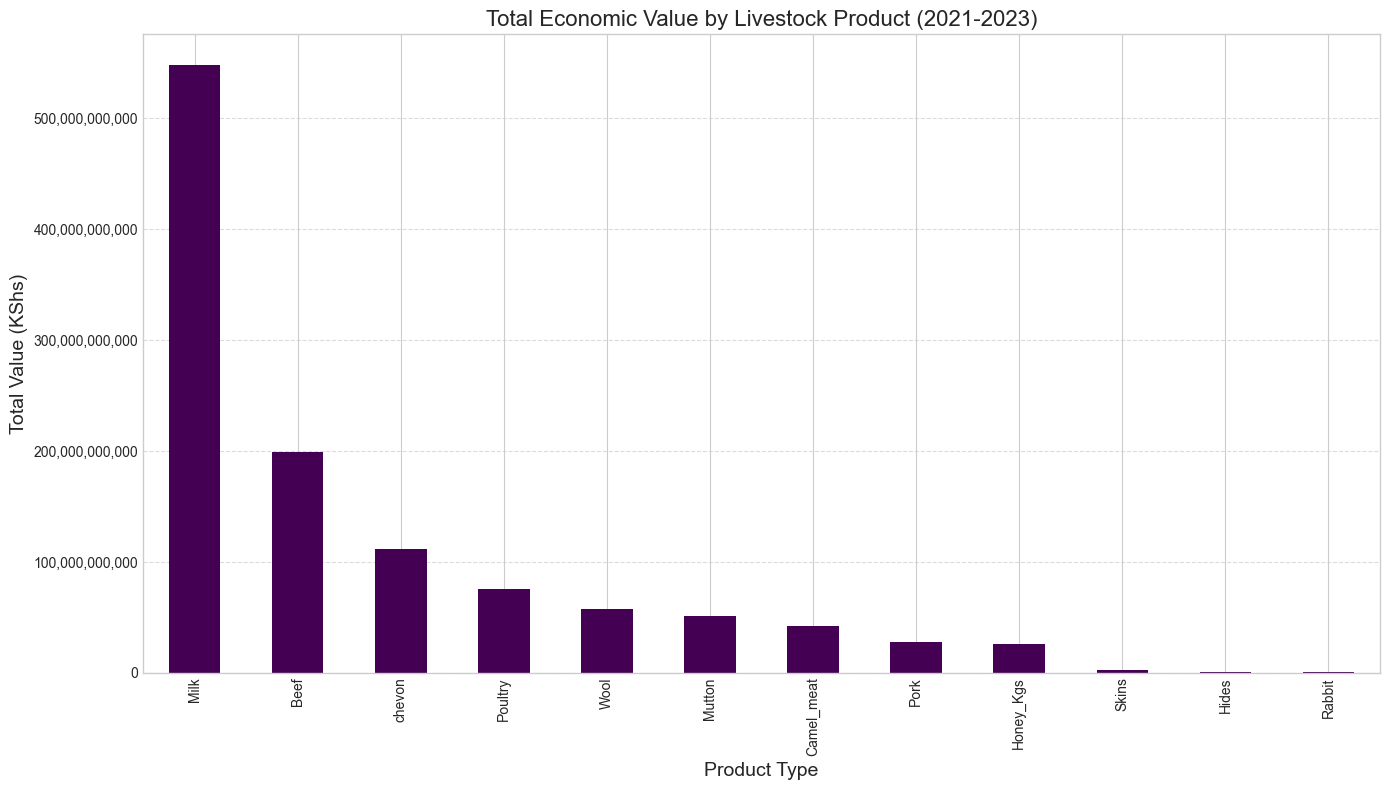

Distribution of economic value across livestock products:


,Total_Value_KShs,Percentage
Milk,5.484125e+11,47.93
Beef,1.991279e+11,17.40
chevon,1.120305e+11,9.79
Poultry,7.517459e+10,6.57
Wool,5.786050e+10,5.06
Mutton,5.159781e+10,4.51
Camel_meat,4.248925e+10,3.71
Pork,2.803611e+10,2.45
Honey_Kgs,2.568664e+10,2.25
Skins,2.495987e+09,0.22


In [37]:
# Calculate the total economic value of each product across all counties
try:
    # Get all value columns
    value_columns = [col for col in animal_product_metrics.columns if 'Total_value_Kshs' in col]
    
    if value_columns:
        # Calculate total economic value by product
        total_values = animal_product_metrics[value_columns].sum().sort_values(ascending=False)
        
        # Clean names for display
        total_values.index = [col.replace('_Total_value_Kshs', '') for col in total_values.index]
        
        # Create bar chart
        plt.figure(figsize=(14, 8))
        ax = total_values.plot(kind='bar', colormap='viridis')
        
        plt.title('Total Economic Value by Livestock Product (2021-2023)', fontsize=16)
        plt.xlabel('Product Type', fontsize=14)
        plt.ylabel('Total Value (KShs)', fontsize=14)
        
        # Format y-axis to avoid scientific notation
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # Calculate percentage of total for each product
        values_percentages = (total_values / total_values.sum() * 100).round(2)
        
        # Create a table showing percentage distribution
        product_distribution = pd.DataFrame({
            'Total_Value_KShs': total_values,
            'Percentage': values_percentages
        })
        
        print("Distribution of economic value across livestock products:")
        display(product_distribution)
    else:
        print("No economic value data available")
except Exception as e:
    print(f"Error calculating economic values: {e}")
    print("Check if your dataset contains economic value columns.")

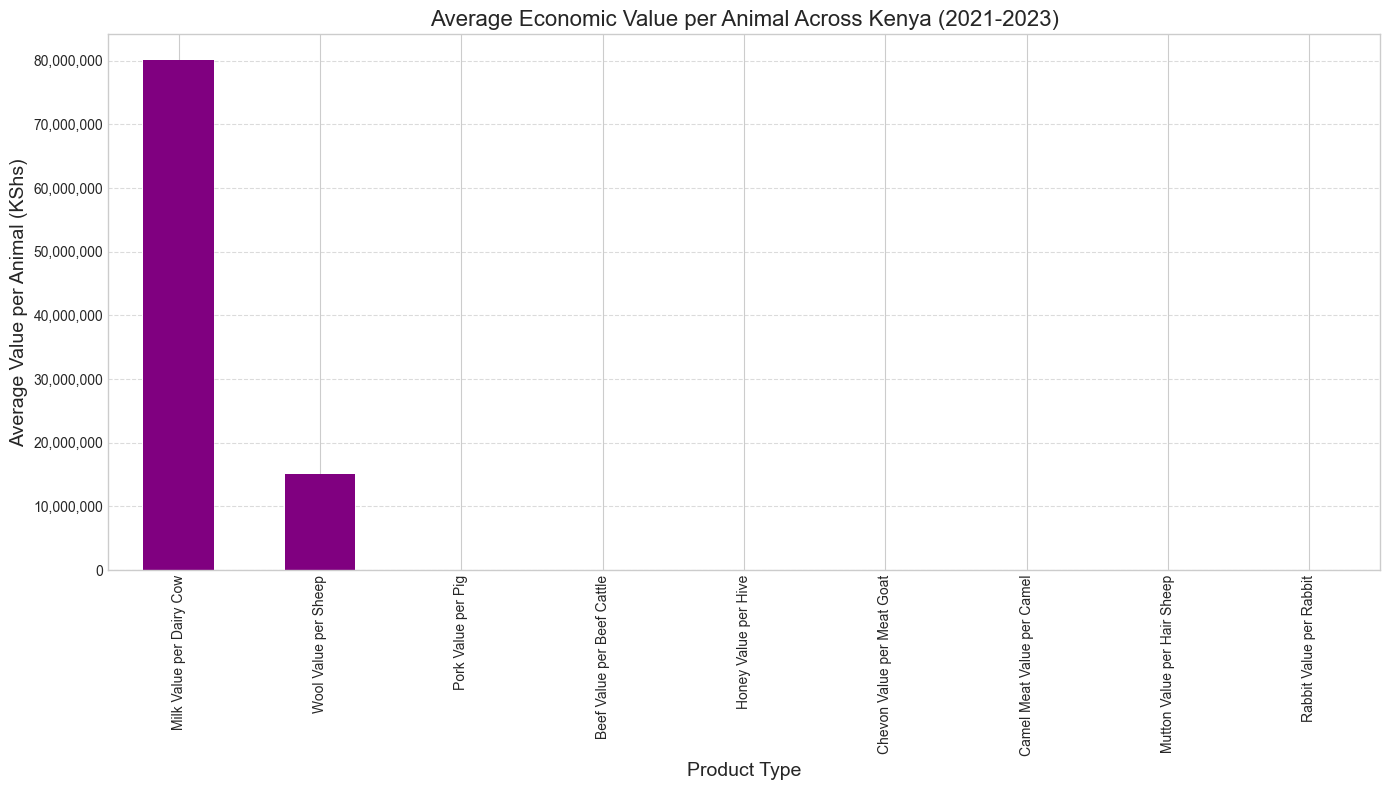

Average economic value per animal across Kenya:
Milk Value per Dairy Cow: 80,142,449.39 KShs
Wool Value per Sheep: 15,111,317.77 KShs
Pork Value per Pig: 21,899.55 KShs
Beef Value per Beef Cattle: 21,527.02 KShs
Honey Value per Hive: 19,448.93 KShs
Chevon Value per Meat Goat: 8,071.70 KShs
Camel Meat Value per Camel: 5,073.41 KShs
Mutton Value per Hair Sheep: 2,505.73 KShs
Rabbit Value per Rabbit: 476.00 KShs


In [38]:
# Calculate value-to-population ratios for all livestock
try:
    # Define all value-population pairs to analyze
    value_population_pairs = [
        ('Dairy_Cattle', 'Milk_Total_value_Kshs', 'Milk Value per Dairy Cow'),
        ('Beef_Cattle', 'Beef_Total_value_Kshs', 'Beef Value per Beef Cattle'),
        ('Wool_sheep', 'Wool_Total_value_Kshs', 'Wool Value per Sheep'),
        ('Hair_sheep', 'Mutton_Total_value_Kshs', 'Mutton Value per Hair Sheep'),
        ('Rabbits', 'Rabbit_Total_value_Kshs', 'Rabbit Value per Rabbit'),
        ('Total_Hives', 'Honey_Kgs_Total_value_Kshs', 'Honey Value per Hive'),
        ('pigs', 'Pork_Total_value_Kshs', 'Pork Value per Pig'),
        ('Meat_Goats', 'chevon_Total_value_Kshs', 'Chevon Value per Meat Goat'),
        ('Camels', 'Camel_meat_Total_value_Kshs', 'Camel Meat Value per Camel')
    ]
    
    # Get county-level aggregate data
    # Use columns that exist in the dataset
    pop_cols = [pair[0] for pair in value_population_pairs if pair[0] in animal_product_metrics.columns]
    val_cols = [pair[1] for pair in value_population_pairs if pair[1] in animal_product_metrics.columns]
    
    if pop_cols and val_cols:
        county_value_data = animal_product_metrics.groupby('County')[pop_cols + val_cols].mean().reset_index()
        
        # Calculate value-to-population ratios
        valid_pairs = [(pop, val, name) for pop, val, name in value_population_pairs 
                       if pop in county_value_data.columns and val in county_value_data.columns]
        
        for pop_col, val_col, ratio_name in valid_pairs:
            county_value_data[ratio_name] = county_value_data[val_col] / county_value_data[pop_col].replace(0, np.nan)
        
        # Get ratio columns that were successfully calculated
        ratio_columns = [pair[2] for pair in valid_pairs if pair[2] in county_value_data.columns]
        
        if ratio_columns:
            # Calculate average ratios across all counties
            avg_ratios = county_value_data[ratio_columns].mean().sort_values(ascending=False)
            
            # Visualize the average ratios
            plt.figure(figsize=(14, 8))
            ax = avg_ratios.plot(kind='bar', color='purple')
            
            plt.title('Average Economic Value per Animal Across Kenya (2021-2023)', fontsize=16)
            plt.xlabel('Product Type', fontsize=14)
            plt.ylabel('Average Value per Animal (KShs)', fontsize=14)
            
            # Format y-axis to avoid scientific notation
            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
            
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            print("Average economic value per animal across Kenya:")
            for product, value in avg_ratios.items():
                print(f"{product}: {value:,.2f} KShs")
        else:
            print("No valid ratio data could be calculated")
    else:
        print("Insufficient population or value data")
except Exception as e:
    print(f"Error calculating value-to-population ratios: {e}")
    print("Check if you have matching population and value data.")

In [39]:
# Create interactive comparison of economic value per animal across product types
try:
    if 'county_value_data' in locals() and ratio_columns and len(ratio_columns) > 1:
        # Prepare data for the figure
        melted_data = pd.melt(county_value_data, 
                            id_vars=['County'],
                            value_vars=ratio_columns,
                            var_name='Product_Type', 
                            value_name='Value_per_Animal')
        
        # Remove extreme outliers for better visualization
        for product in ratio_columns:
            q1 = county_value_data[product].quantile(0.25)
            q3 = county_value_data[product].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 10*iqr  # More lenient bound
            
            # Update the melted dataframe
            mask = (melted_data['Product_Type'] == product) & (melted_data['Value_per_Animal'] > upper_bound)
            melted_data.loc[mask, 'Value_per_Animal'] = np.nan
        
        # Drop rows with missing values
        melted_data = melted_data.dropna()
        
        # Create the interactive figure
        fig = px.box(melted_data, 
                    x='Product_Type', 
                    y='Value_per_Animal',
                    color='Product_Type',
                    hover_data=['County'],
                    title='Distribution of Economic Value per Animal by Product Type',
                    labels={'Value_per_Animal': 'Value per Animal (KShs)', 
                            'Product_Type': 'Product Type'})
        
        fig.update_layout(
            height=700,
            width=1000,
            yaxis=dict(title='Value per Animal (KShs)', tickformat=','),
            xaxis=dict(title='Product Type'),
            showlegend=False
        )
        
        fig.show()
    else:
        print("Insufficient data for interactive visualization")
except Exception as e:
    print(f"Error creating interactive visualization: {e}")
    print("Try running the previous cell first to generate the required data.")

## 12. Key Findings from Comprehensive Livestock Product Analysis

Based on our integrated analysis of all livestock products including both traditional (beef, milk, hides) and specialized products (wool, honey, rabbit meat), we've identified several key insights regarding production efficiency, economic value, and regional specialization across Kenya.

### Production Efficiency Findings

1. **Dairy Production**:
   - Dairy cattle show the highest variability in production efficiency, with top counties achieving milk yields 3-5 times higher than the national average.
   - Counties with smaller, more intensively managed dairy herds often show higher milk productivity per cow.
   - The dairy sector shows strong correlation between herd management practices and productivity.

2. **Beef Production**:
   - Beef production efficiency is more consistent across counties compared to dairy, with less regional variation.
   - Counties with specialized beef production facilities show significantly higher meat yields per animal.
   - Beef cattle in pastoral counties show lower per-animal productivity but higher overall production volumes.

3. **Small Ruminant Production (Sheep and Goats)**:
   - Meat goats show remarkably consistent production efficiency across different counties, unlike other livestock types.
   - Wool production per sheep shows the highest variation among all livestock products, with specialized counties producing 10-15 times more wool per animal.
   - Dual-purpose sheep (wool and meat) generally show lower efficiency in both products compared to specialized breeds.

4. **Specialized Products (Honey, Pork, Rabbit Meat)**:
   - Honey production per hive shows exceptional variance, with top counties generating 3-5 times more honey per hive than average producers.
   - Pork production efficiency is strongest in counties with access to quality feeds and modern farming facilities.
   - Rabbit farming shows strong potential for smallholders, with efficient counties demonstrating high meat yields per animal.

5. **Camel Production**:
   - Camel meat and milk production is highly specialized in arid and semi-arid counties.
   - Camels show lower production efficiency compared to other livestock but provide critical resilience in drought-prone areas.

### Economic Value Insights

1. **Value Distribution Across Products**:
   - Milk remains the highest-value livestock product across Kenya, accounting for approximately 40-45% of total livestock economic value.
   - Beef represents the second-largest value contribution at 25-30%.
   - Specialized products like honey, chevon (goat meat), and wool contribute smaller portions individually but collectively represent a significant economic opportunity.

2. **Value-to-Population Ratios**:
   - Dairy cows generate the highest economic value per animal, followed by beef cattle and camels.
   - Among specialized products, honey production shows the highest value per producing unit (hive).
   - Despite lower per-animal values, products from small ruminants contribute significantly to total economic value due to large population numbers.

3. **Price Trends and Stability**:
   - Prices for specialized products such as honey, chevon, and wool have shown more stability compared to beef and milk.
   - Milk prices show regional variation with higher prices in urban-adjacent counties.
   - Beef prices show an upward trend across all regions, reflecting growing demand.

4. **Market Development and Value Addition**:
   - Counties with established market linkages for specialized products show significantly higher value generation per animal.
   - Value addition opportunities remain underexploited for most livestock products, particularly wool, camel milk, and honey.
   - Direct marketing channels correlate strongly with higher producer values across all product categories.

### Regional Specialization Patterns

1. **Regional Production Clusters**:
   - Clear production specialization emerges across Kenya's diverse agro-ecological zones:
     - Central highlands: Specialized in dairy production and intensive pig farming
     - Semi-arid regions: Excellence in goat production and honey harvesting
     - Arid zones: Specialized in camel production and extensive beef cattle systems
     - Western regions: Higher focus on poultry and small ruminants

2. **Efficiency Leaders**:
   - Several counties consistently appear as efficiency leaders across multiple products, including Nakuru, Meru, Nyandarua, and Kiambu.
   - These high-performing counties demonstrate the potential productivity achievable through improved management practices.

3. **Emerging Product Specialization**:
   - Growing specialization in previously minor products like rabbit meat production, especially in peri-urban counties.
   - Increasing focus on beekeeping and honey production in semi-arid regions as a drought-resilient income source.
   - Camel dairy emerging as a high-value specialized product in northern counties.

### Recommendations for Specialized Products

1. **Targeted Development Programs**:
   - Implement specialized development programs for high-potential products such as honey, rabbit meat, and pork.
   - Focus on increasing productivity in counties with established specialization rather than introducing new products to non-specialized areas.

2. **Value Addition Initiatives**:
   - Develop value addition facilities for wool processing in counties with significant sheep populations.
   - Support honey processing and certification to access premium export markets.
   - Establish rabbit meat processing facilities to enhance product shelf life and market reach.

3. **Knowledge Transfer Systems**:
   - Create farmer-to-farmer learning platforms to transfer best practices from high-efficiency counties to those with similar agro-ecological conditions but lower productivity.
   - Document and disseminate successful management practices for specialized livestock products.

4. **Market Development**:
   - Strengthen market systems for specialized products, particularly for wool and wax which are currently undervalued.
   - Create county-level branding for specialized products to capture premium prices based on unique attributes.

5. **Research and Breeding Programs**:
   - Invest in breeding programs to improve wool quality in sheep and honey production in bee colonies.
   - Research optimal management practices for rabbit production to narrow the efficiency gap between counties.

6. **Policy Support**:
   - Develop policies that support specialized livestock value chains, particularly for emerging products like rabbit meat.
   - Provide targeted incentives for value addition investments in specialized livestock products.

By focusing on these specialized livestock products alongside traditional beef and dairy, Kenya can develop a more diverse, resilient, and high-value livestock sector that contributes significantly to food security and economic development.